In [2]:
# @title Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import requests
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from numpy import pi
from copy import copy
import ipywidgets as widgets  # interactive display

# @title Figure settings
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 11
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


/Users/az/Learn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
data = pd.read_csv("data01_direction4priors.csv")
data.head()

trial_index  trial_time  response_arrow_start_angle  motion_direction  \
0            1    0.000000                         NaN               225   
1            2    2.730730                         NaN               225   
2            3    4.913950                         NaN               235   
3            4    6.997296                         NaN               225   
4            5    9.097130                         NaN               215   

   motion_coherence  estimate_x  estimate_y  reaction_time  raw_response_time  \
0              0.12   -1.749685   -1.785666            NaN                NaN   
1              0.12   -1.819693   -1.714269            NaN                NaN   
2              0.06   -1.562674   -1.951422            NaN                NaN   
3              0.06   -1.601388   -1.919781            NaN                NaN   
4              0.24   -1.639461   -1.887371            NaN                NaN   

   prior_std  prior_mean  subject_id          experiment_name  experiment_id  \
0         10         225           1  data01_direction4priors             11   
1         10         225           1  data01_direction4priors             11   
2         10         225           1  data01_direction4priors             11   
3         10         225           1  data01_direction4priors             11   
4         10         225           1  data01_direction4priors             11   

   session_id  run_id  
0           1       1  
1           1       1  
2           1       1  
3           1       1  
4           1       1

In [4]:
# Calculate estimated degree in a new field with this name
# estimated_degree = np.degrees(np.arctan2(data['estimate_x'], data['estimate']))
data['estimated_degree'] = (np.degrees(np.arctan2(data['estimate_x'], data['estimate_y'])) + 360) % 360


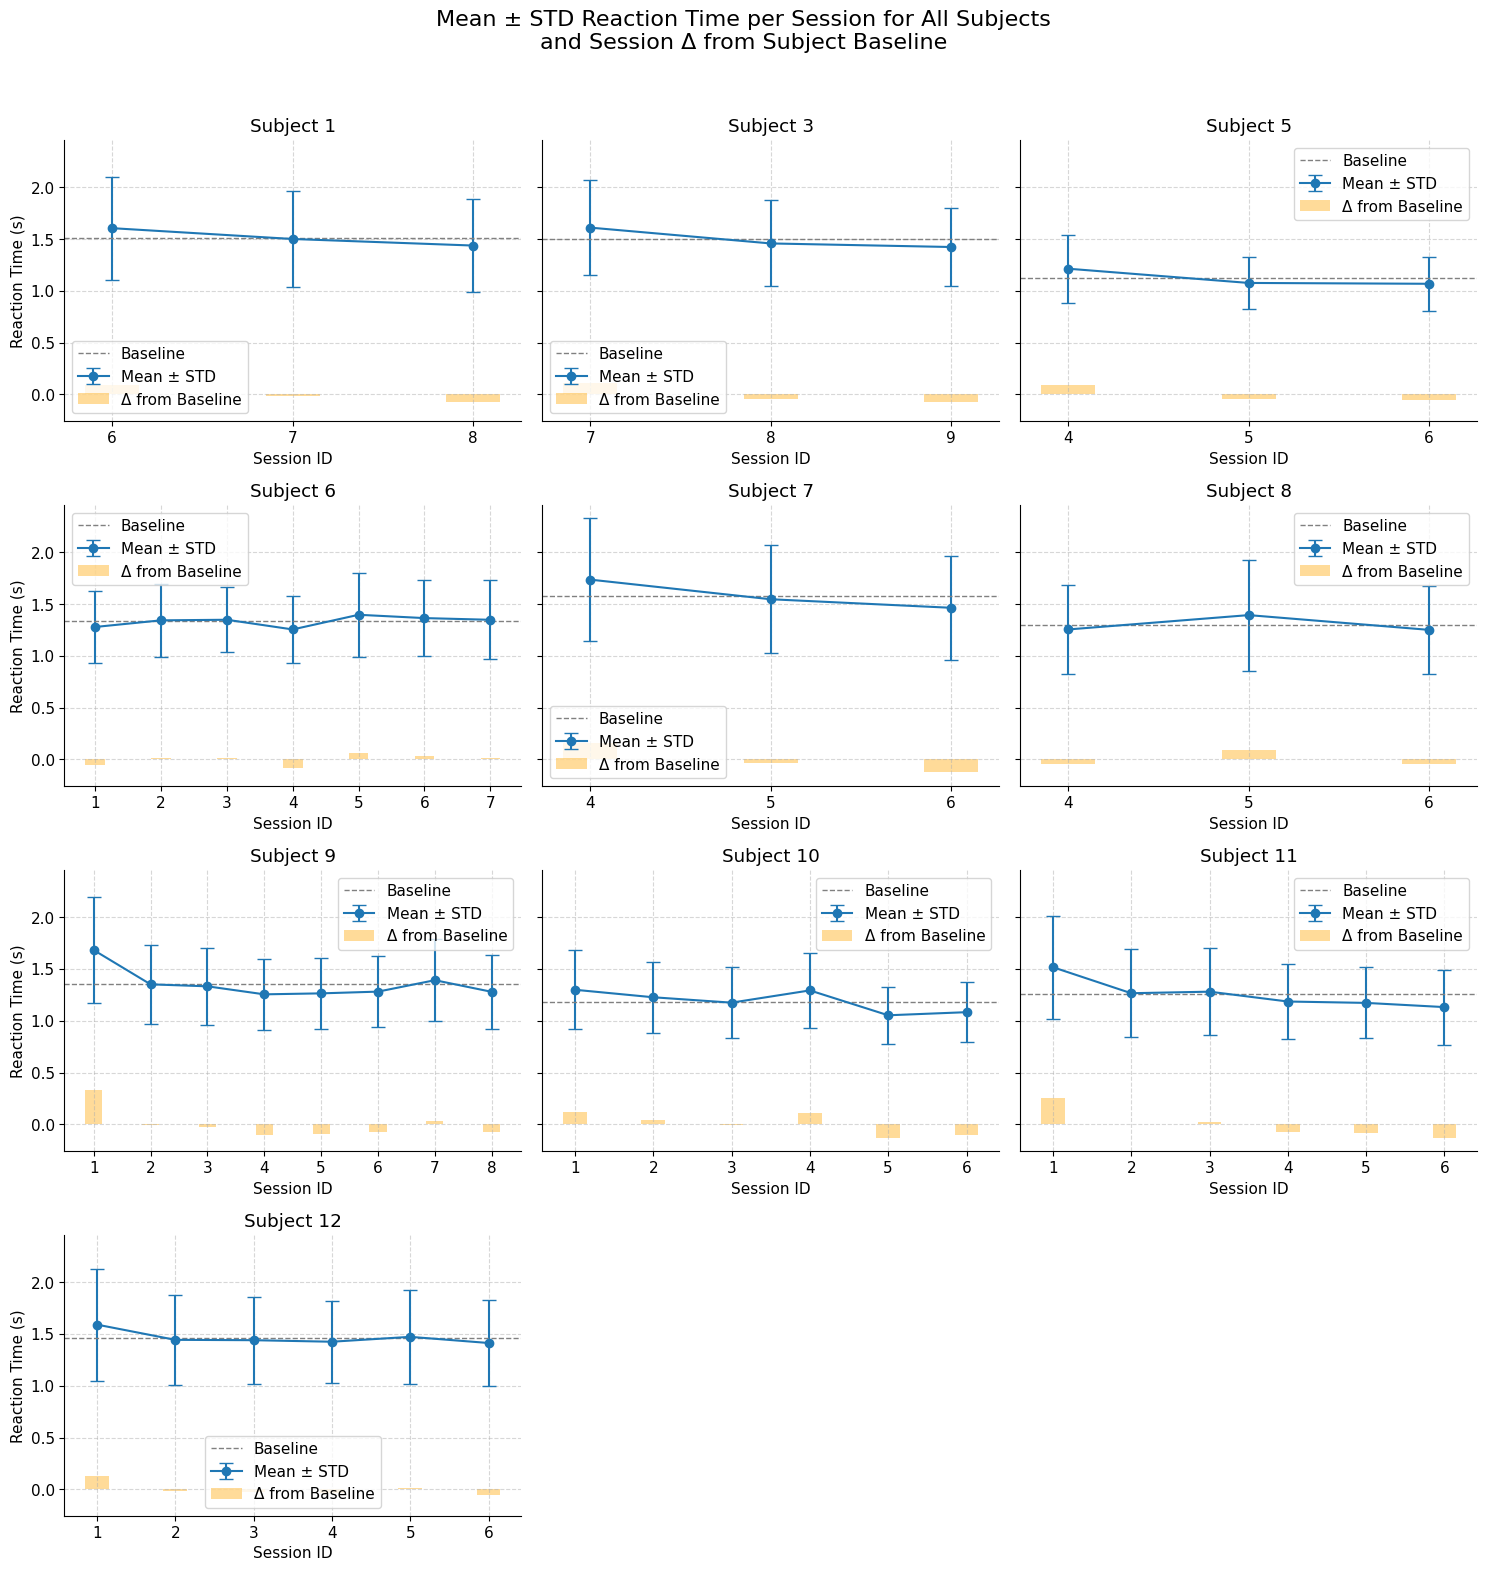

Mean RT and |Δ from Baseline| per (Subject, Session):


mean_rt abs_diff
subject_id session_id                 
1          1             None     None
           2             None     None
           3             None     None
           4             None     None
           5             None     None
           6            1.605    0.091
           7            1.501    0.014
           8            1.438    0.077
           9             None     None
3          1             None     None
           2             None     None
           3             None     None
           4             None     None
           5             None     None
           6             None     None
           7            1.611    0.113
           8            1.458    0.039
           9            1.423    0.074
5          1             None     None
           2             None     None
           3             None     None
           4            1.214    0.094
           5            1.077    0.043
           6            1.068    0.051
           7             None     None
           8             None     None
           9             None     None
6          1            1.278    0.055
           2            1.342    0.009
           3            1.348    0.015
           4            1.255    0.079
           5            1.396    0.063
           6            1.364    0.031
           7            1.348    0.015
           8             None     None
           9             None     None
7          1             None     None
           2             None     None
           3             None     None
           4            1.736    0.154
           5            1.546    0.036
           6            1.464    0.118
           7             None     None
           8             None     None
           9             None     None
8          1             None     None
           2             None     None
           3             None     None
           4            1.255    0.045
           5            1.393    0.094
           6             1.25    0.049
           7             None     None
           8             None     None
           9             None     None
9          1            1.683    0.328
           2            1.352    0.003
           3            1.333    0.022
           4            1.255      0.1
           5            1.265     0.09
           6            1.281    0.074
           7            1.392    0.037
           8            1.279    0.076
           9             None     None
10         1            1.299    0.114
           2            1.227    0.042
           3            1.175     0.01
           4            1.293    0.108
           5            1.053    0.132
           6            1.083    0.102
           7             None     None
           8             None     None
           9             None     None
11         1            1.517    0.258
           2            1.266    0.007
           3            1.281    0.022
           4            1.186    0.073
           5            1.173    0.087
           6            1.132    0.127
           7             None     None
           8             None     None
           9             None     None
12         1             1.59    0.126
           2            1.443    0.021
           3             1.44    0.024
           4            1.425    0.039
           5            1.472    0.008
           6            1.413    0.051
           7             None     None
           8             None     None
           9             None     None

Mean RT per (Subject, Session):


session_id      1      2      3      4      5      6      7      8      9
subject_id                                                               
1            None   None   None   None   None  1.605  1.501  1.438   None
3            None   None   None   None   None   None  1.611  1.458  1.423
5            None   None   None  1.214  1.077  1.068   None   None   None
6           1.278  1.342  1.348  1.255  1.396  1.364  1.348   None   None
7            None   None   None  1.736  1.546  1.464   None   None   None
8            None   None   None  1.255  1.393   1.25   None   None   None
9           1.683  1.352  1.333  1.255  1.265  1.281  1.392  1.279   None
10          1.299  1.227  1.175  1.293  1.053  1.083   None   None   None
11          1.517  1.266  1.281  1.186  1.173  1.132   None   None   None
12           1.59  1.443   1.44  1.425  1.472  1.413   None   None   None

|Δ from Baseline| per (Subject, Session):


session_id      1      2      3      4      5      6      7      8      9
subject_id                                                               
1            None   None   None   None   None  0.091  0.014  0.077   None
3            None   None   None   None   None   None  0.113  0.039  0.074
5            None   None   None  0.094  0.043  0.051   None   None   None
6           0.055  0.009  0.015  0.079  0.063  0.031  0.015   None   None
7            None   None   None  0.154  0.036  0.118   None   None   None
8            None   None   None  0.045  0.094  0.049   None   None   None
9           0.328  0.003  0.022    0.1   0.09  0.074  0.037  0.076   None
10          0.114  0.042   0.01  0.108  0.132  0.102   None   None   None
11          0.258  0.007  0.022  0.073  0.087  0.127   None   None   None
12          0.126  0.021  0.024  0.039  0.008  0.051   None   None   None

In [5]:
# Plot mean and std of reaction_time per session for all subjects,
# and for each subject, add a barplot showing how much each session's mean reaction time
# differs from that subject's overall mean (performance baseline).

# Only consider rows with non-null reaction_time
filtered_data = data[data['reaction_time'].notna()]

# Compute mean and std of reaction_time per subject and session
all_stats = filtered_data.groupby(['subject_id', 'session_id'])['reaction_time'].agg(['mean', 'std']).reset_index()

# Compute each subject's overall mean reaction time (performance baseline)
subject_baselines = filtered_data.groupby('subject_id')['reaction_time'].mean().to_dict()

subjects = sorted(filtered_data['subject_id'].unique())
sessions = sorted(filtered_data['session_id'].unique())
n_subjects = len(subjects)
n_sessions = len(sessions)
ncols = 3
nrows = int(np.ceil(n_subjects / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4), sharey=True)
axes = axes.flatten()

for idx, subj in enumerate(subjects):
    subj_stats = all_stats[all_stats['subject_id'] == subj]
    ax = axes[idx]
    # Errorbar plot: mean ± std per session
    ax.errorbar(
        subj_stats['session_id'],
        subj_stats['mean'],
        yerr=subj_stats['std'],
        fmt='o-', capsize=5, label='Mean ± STD'
    )
    # Barplot: difference from subject's baseline
    baseline = subject_baselines[subj]
    diff_from_baseline = subj_stats['mean'] - baseline
    ax.bar(
        subj_stats['session_id'],
        diff_from_baseline,
        width=0.3,
        alpha=0.4,
        color='orange',
        label='Δ from Baseline'
    )
    ax.axhline(baseline, color='gray', linestyle='--', linewidth=1, label='Baseline')
    ax.set_title(f'Subject {subj}')
    ax.set_xlabel('Session ID')
    if idx % ncols == 0:
        ax.set_ylabel('Reaction Time (s)')
    ax.set_xticks(subj_stats['session_id'])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
# Hide unused subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Mean ± STD Reaction Time per Session for All Subjects\nand Session Δ from Subject Baseline', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

# --- Add table of (mean RT, abs diff from baseline) for each (subject, session) ---

import pandas as pd
import numpy as np

# Prepare a DataFrame with MultiIndex (subject, session)
index = pd.MultiIndex.from_product([subjects, sessions], names=['subject_id', 'session_id'])
table_df = pd.DataFrame(index=index, columns=['mean_rt', 'abs_diff'])

for subj in subjects:
    baseline = subject_baselines[subj]
    for sess in sessions:
        stat = all_stats[(all_stats['subject_id'] == subj) & (all_stats['session_id'] == sess)]
        if not stat.empty:
            mean_rt = float(stat['mean'].iloc[0])
            abs_diff = abs(mean_rt - baseline)
            table_df.loc[(subj, sess), 'mean_rt'] = round(mean_rt, 3)
            table_df.loc[(subj, sess), 'abs_diff'] = round(abs_diff, 3)
        else:
            table_df.loc[(subj, sess), ['mean_rt', 'abs_diff']] = [None, None]

# Set display options to show the full DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 200, 'display.max_colwidth', None):
    print("Mean RT and |Δ from Baseline| per (Subject, Session):")
    display(table_df)

    # Also show wide format for mean_rt and abs_diff
    mean_rt_wide = table_df['mean_rt'].unstack(level='session_id')
    print("Mean RT per (Subject, Session):")
    display(mean_rt_wide)

    abs_diff_wide = table_df['abs_diff'].unstack(level='session_id')
    print("|Δ from Baseline| per (Subject, Session):")
    display(abs_diff_wide)

session_subject_with_less_then_5 = table_df[table_df['abs_diff'] <= 0.05]


In [6]:
# Get pairs of (subject, session) where abs_diff_wide value is less than 0.05
stable_reaction_time_data = pd.DataFrame()
for subj in abs_diff_wide.index:
    for sess in abs_diff_wide.columns:
        val = abs_diff_wide.loc[subj, sess]
        if pd.notnull(val) and val < 0.05:
            stable_reaction_time_data = pd.concat([stable_reaction_time_data, data[(data['subject_id'] == subj) & (data['session_id'] == sess)]])

print(stable_reaction_time_data.shape)

(22456, 17)


Dropdown(description='Subject ID:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), …

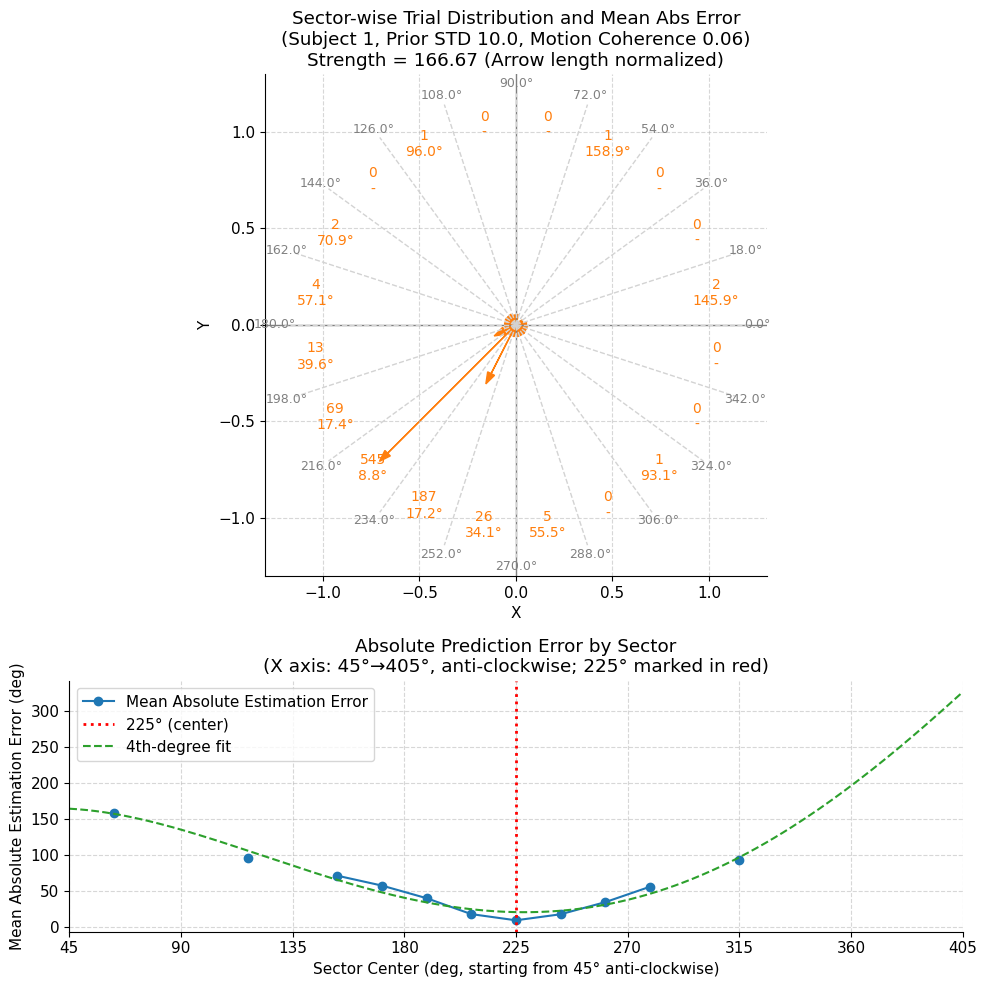

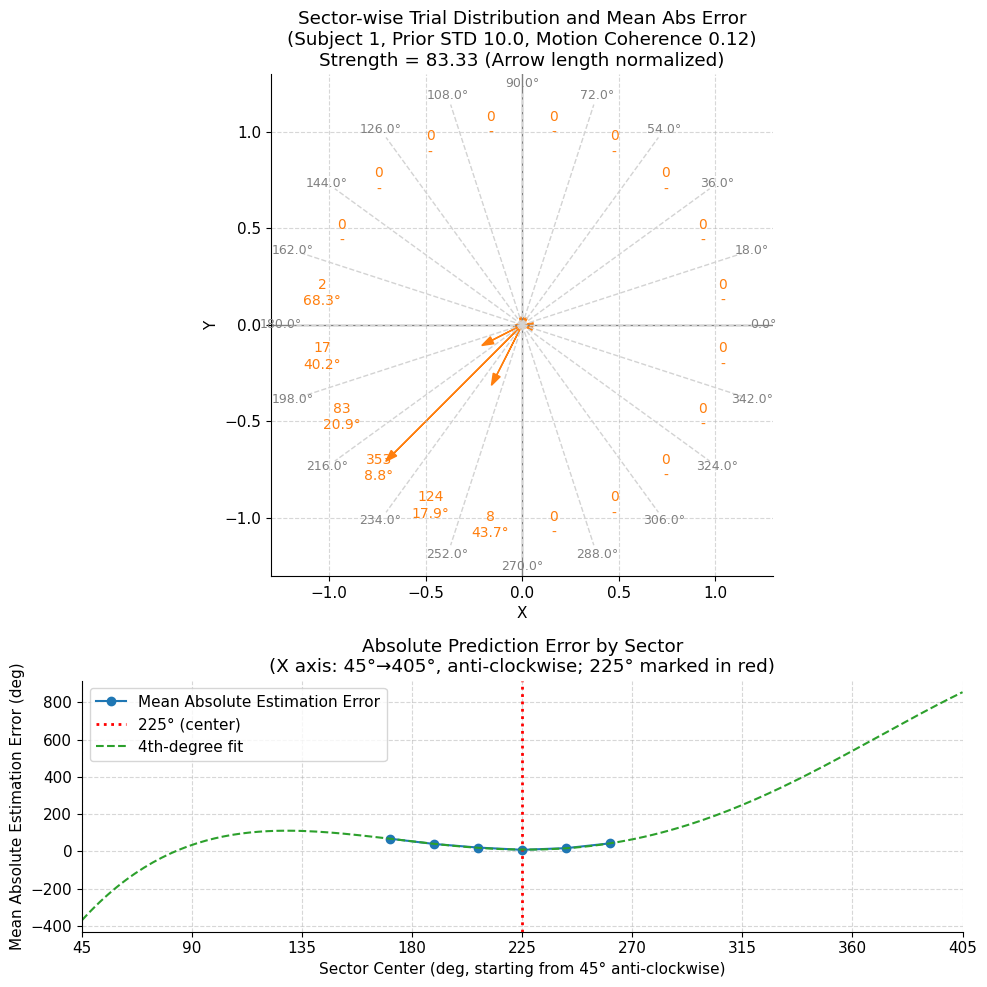

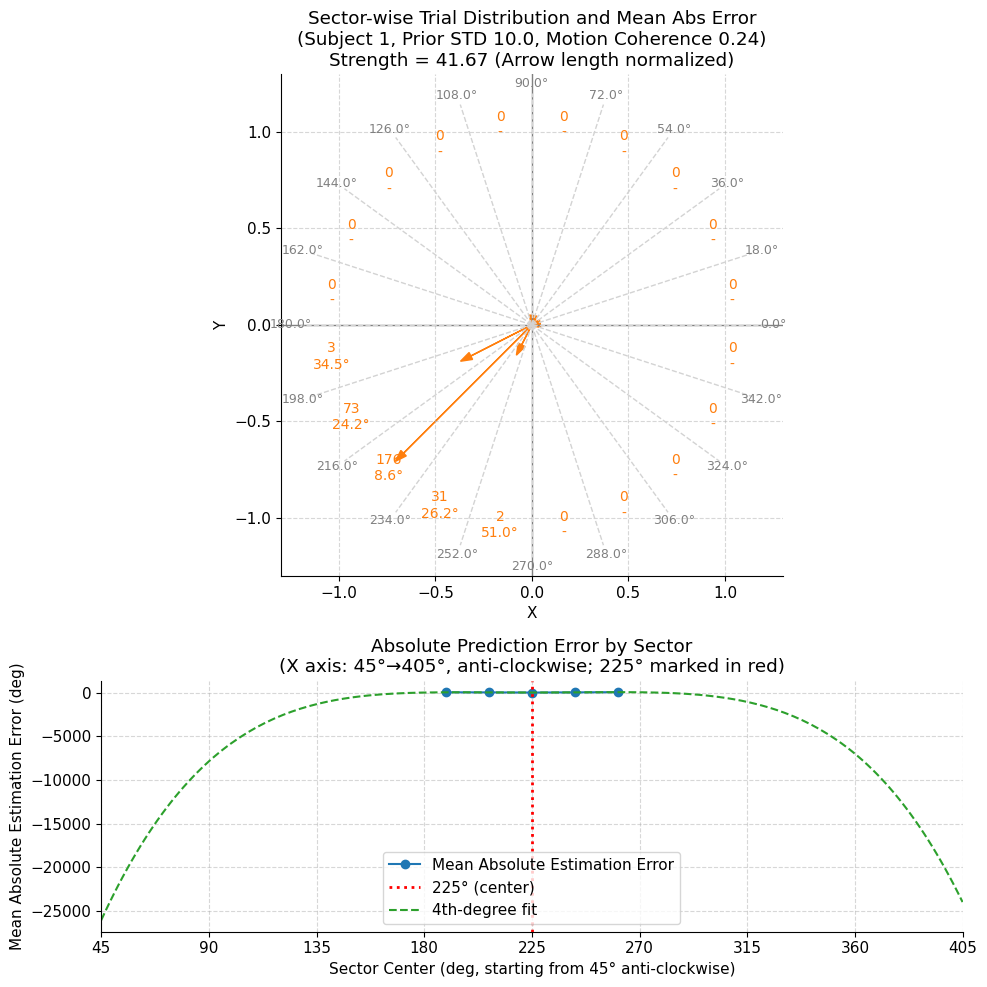

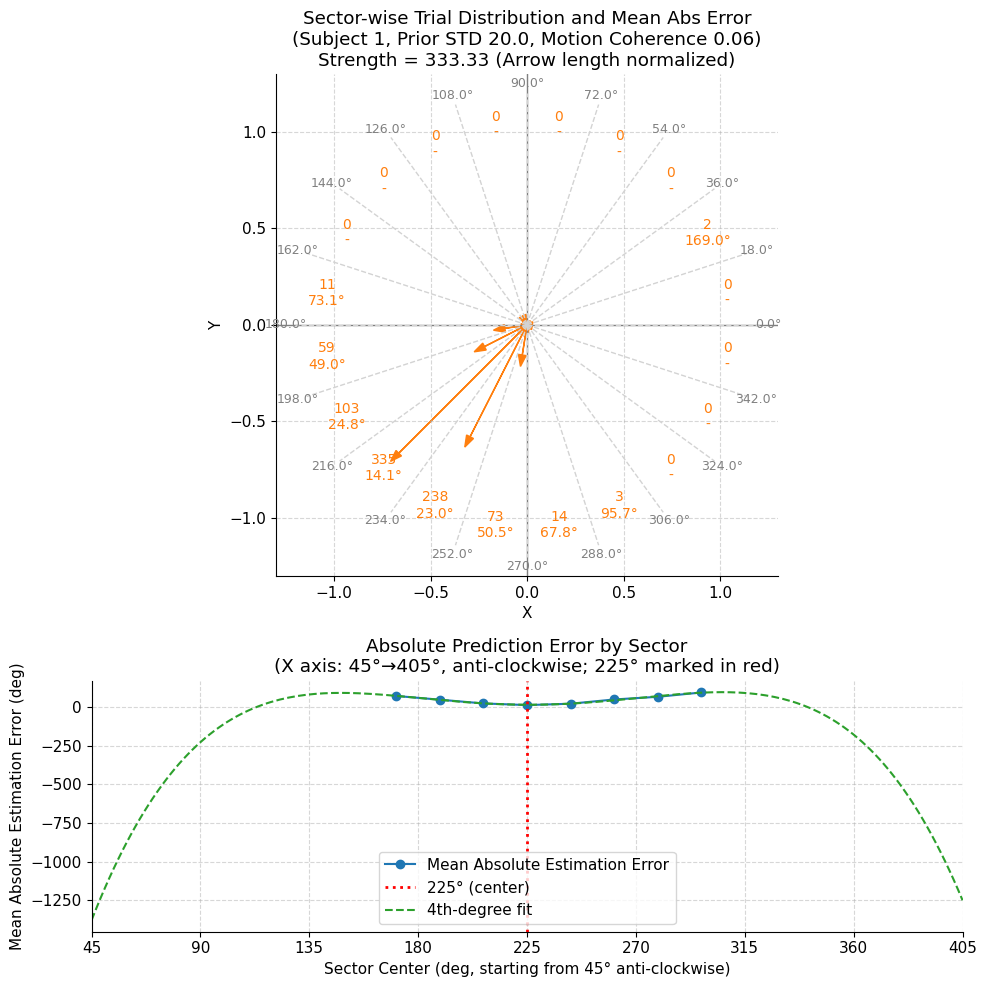

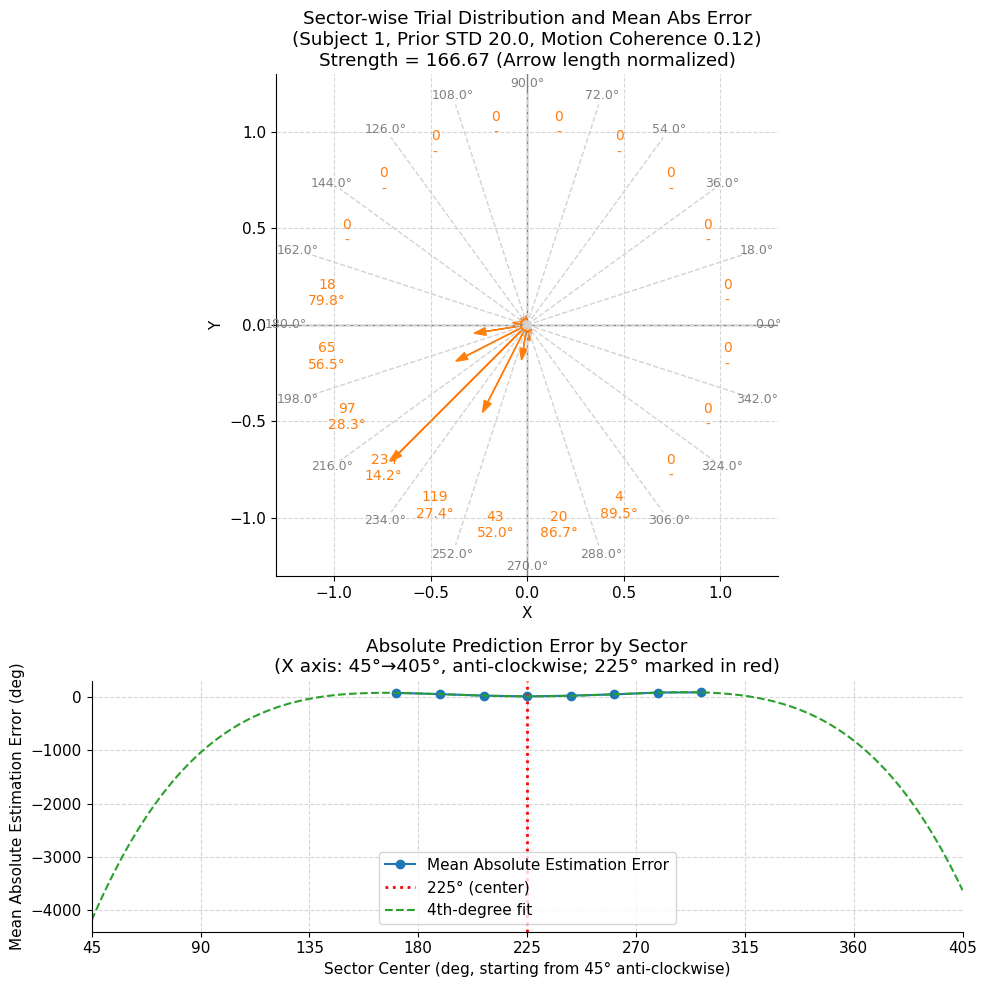

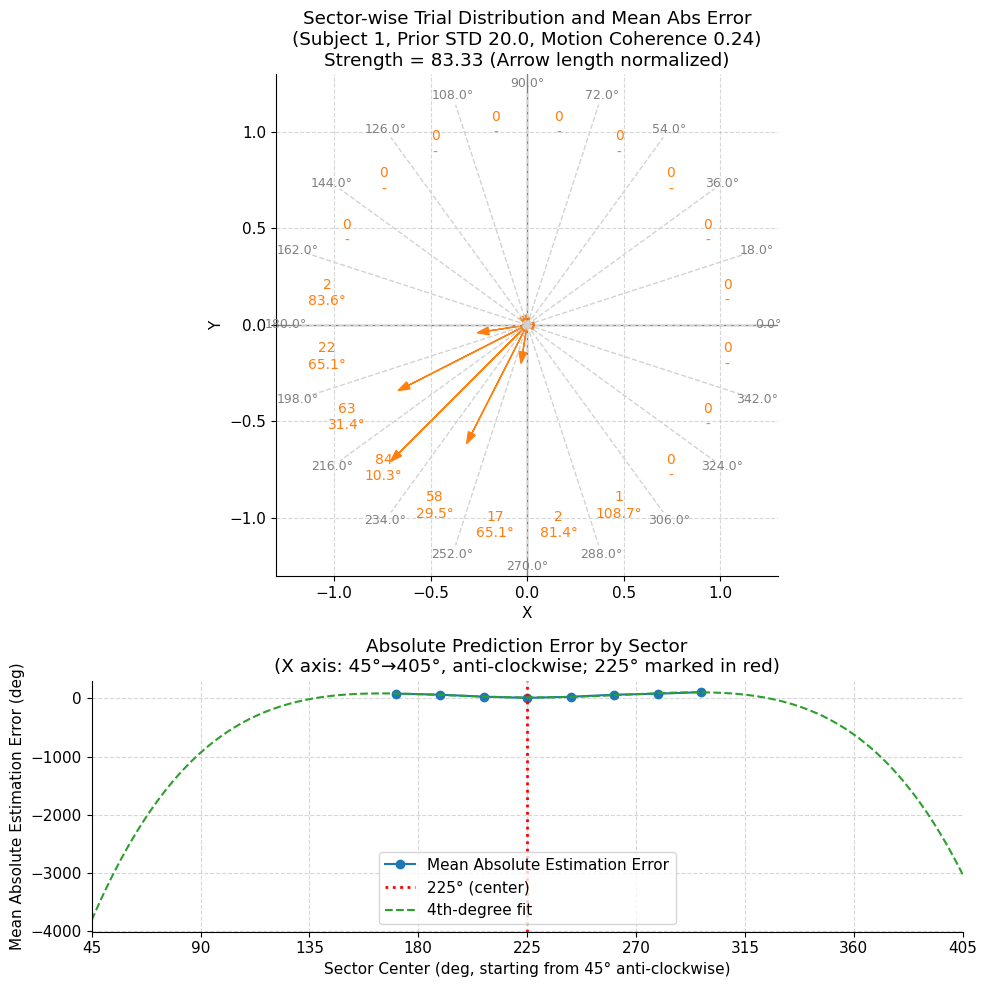

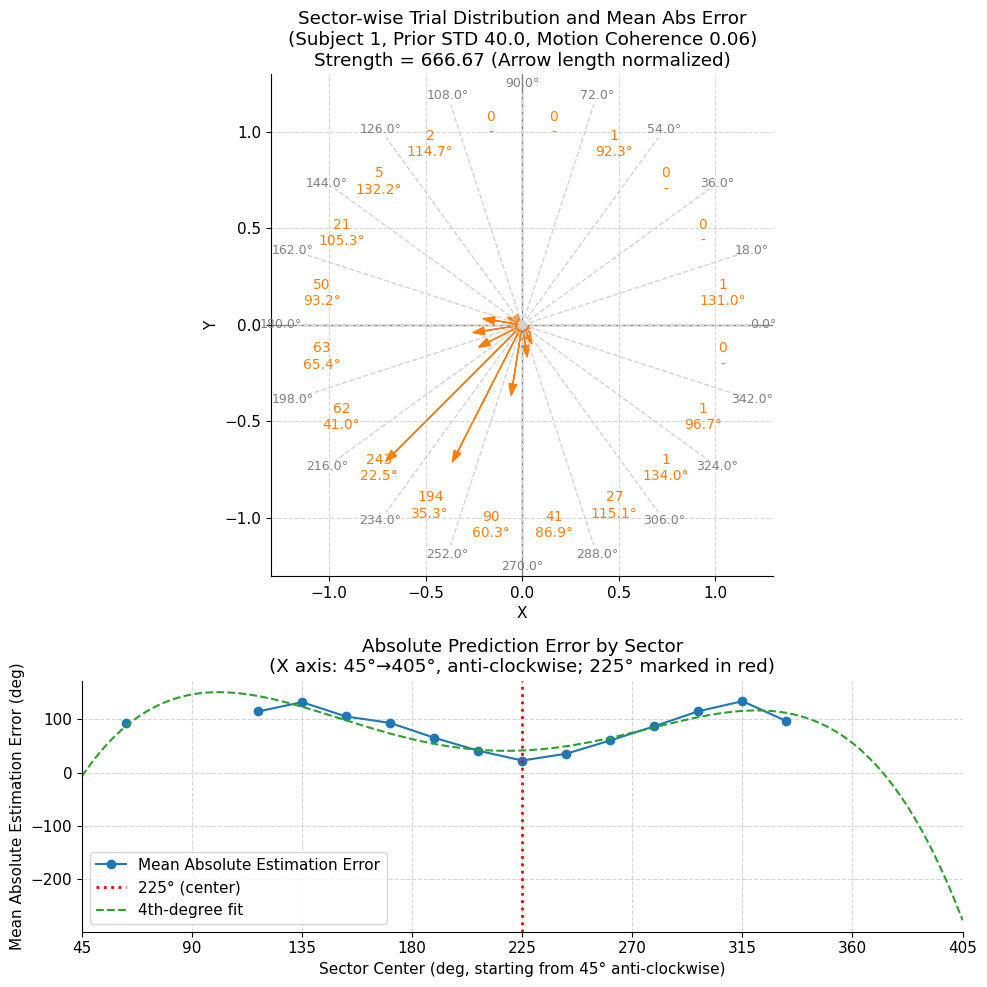

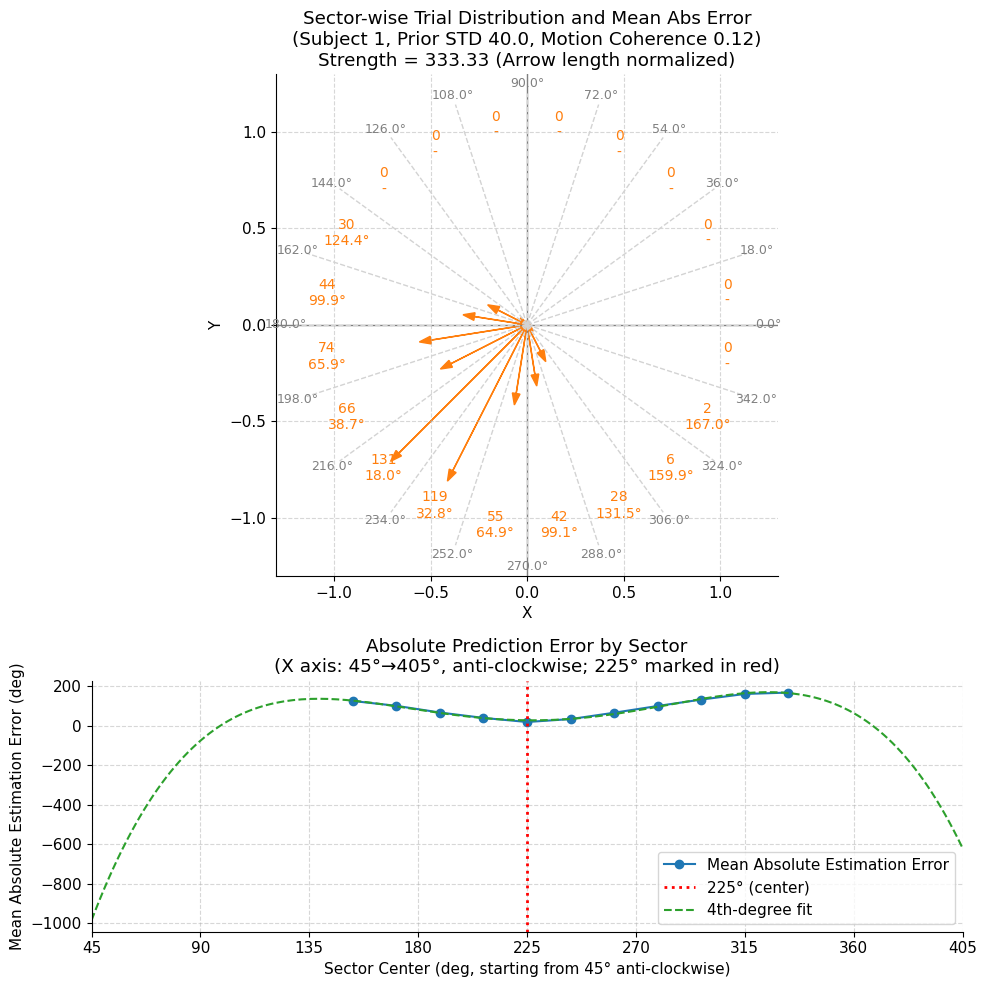

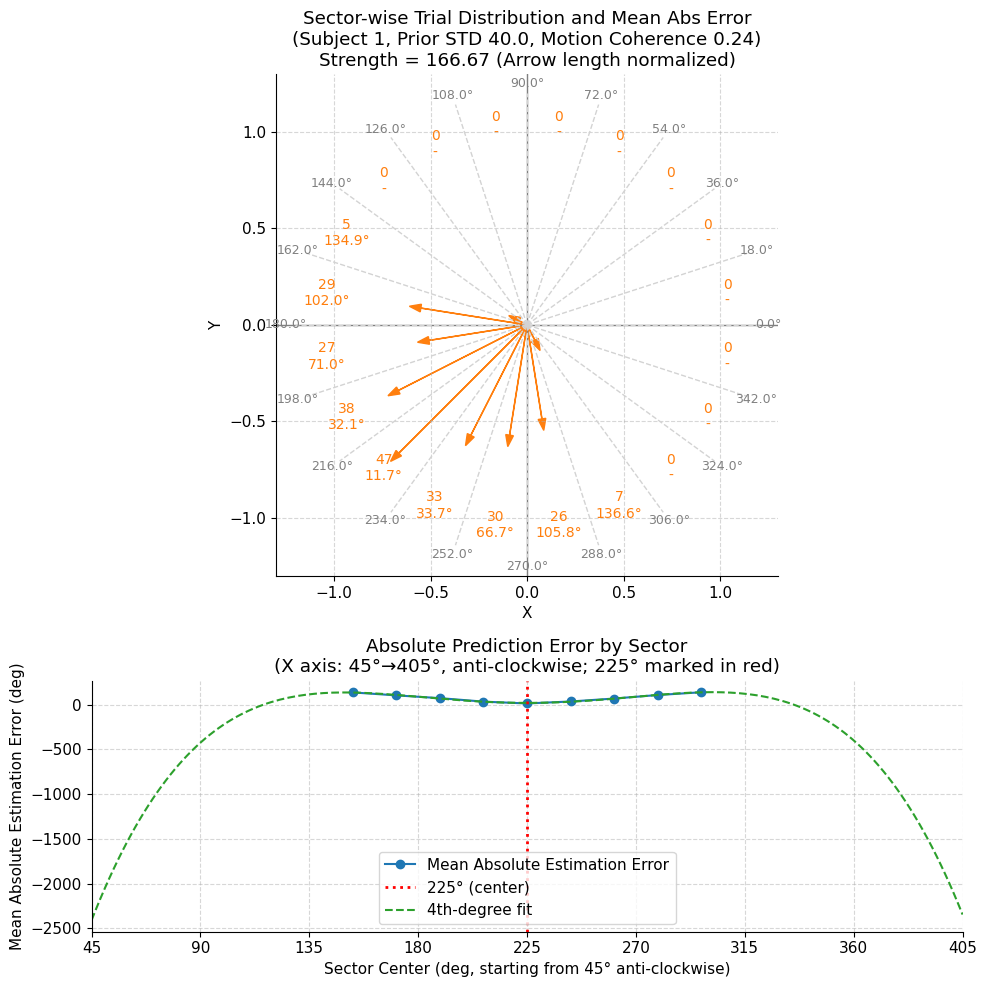

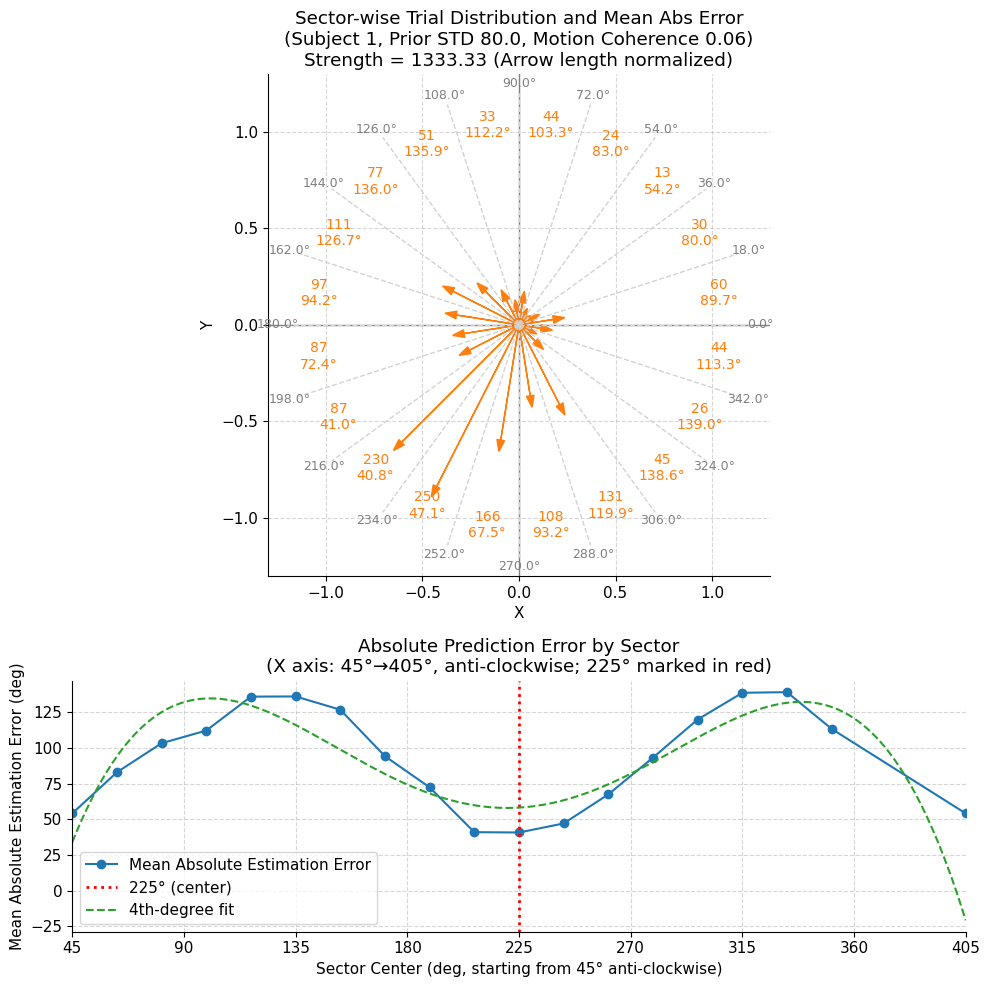

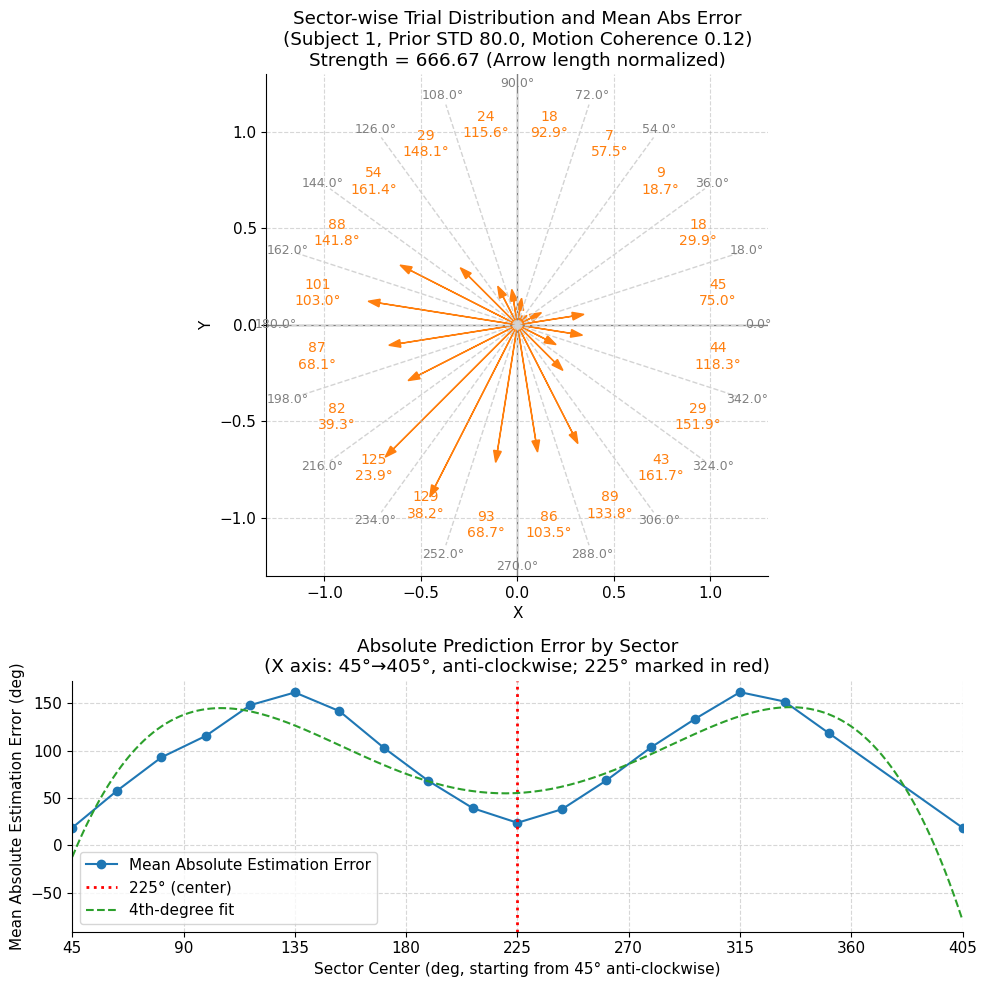

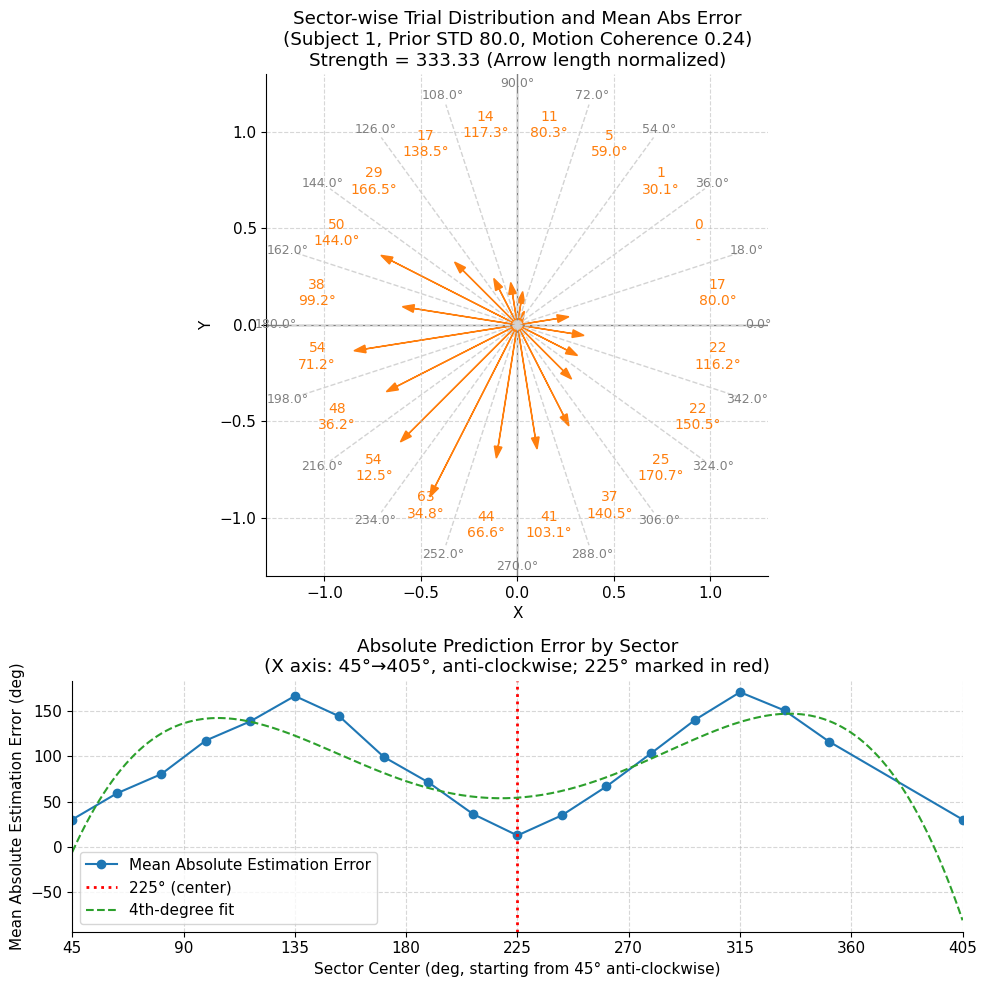

In [7]:
# Plot 12 figures, each for a unique (prior_std, motion_coherence) combination, for a selected subject.
# For each: top is the sector plot as before, bottom is a prediction-error plot (mean absolute estimation error per sector).
# The x-axis of the error plot starts from 45°, goes anti-clockwise, and reaches 45° again (i.e., 45→405).
# The y-axis is mean absolute estimation error (in degrees). Also, fit a 4-degree polynomial to the error curve.
# (RTs are removed from all plots and labels.)

import ipywidgets as widgets
from IPython.display import display, clear_output

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

subject_ids = sorted(stable_rt_data['subject_id'].unique())

subject_id_widget = widgets.Dropdown(
    options=subject_ids,
    value=subject_ids[0],
    description='Subject ID:',
    style={'description_width': 'initial'}
)

def plot_sector_distribution_for_combinations(subject_id):
    combos = stable_rt_data[['prior_std', 'motion_coherence']].drop_duplicates().sort_values(['prior_std', 'motion_coherence'])
    combos = combos.reset_index(drop=True)
    
    for idx, row in combos.iterrows():
        prior_std = row['prior_std']
        motion_coherence = row['motion_coherence']
        strength = prior_std / motion_coherence if motion_coherence != 0 else float('inf')
        
        filtered_data = stable_rt_data[
            (stable_rt_data['subject_id'] == subject_id) &
            (stable_rt_data['prior_std'] == prior_std) &
            (stable_rt_data['motion_coherence'] == motion_coherence)
        ]
        filtered_data = filtered_data[filtered_data['trial_time'].notna()]

        N_sectors = 20
        sector_edges = np.linspace(0, 360, N_sectors + 1)
        sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

        # For both plots, collect stats per sector
        sector_counts = []
        sector_mean_abs_diffs = []
        sector_mean_signed_errors = []
        for i in range(N_sectors):
            lower = sector_edges[i]
            upper = sector_edges[i+1]
            is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
            if is_it_open_close:
                mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
            else:
                mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

            count = mask.sum()
            sector_counts.append(count)
            if count > 0:
                # Absolute error for sector plot
                diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
                mean_abs_diff = diffs.mean()
                # Signed error for error plot
                signed_errors = ((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180
                mean_signed_error = signed_errors.mean()
            else:
                mean_abs_diff = np.nan
                mean_signed_error = np.nan
            sector_mean_abs_diffs.append(mean_abs_diff)
            sector_mean_signed_errors.append(mean_signed_error)

        sector_counts_arr = np.array(sector_counts)
        sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
        sector_mean_signed_errors_arr = np.array(sector_mean_signed_errors)
        total_trials = len(filtered_data)

        # Normalize arrow lengths: scale so the longest arrow is 1.0 (if any nonzero)
        if np.any(sector_counts_arr > 0):
            max_count = sector_counts_arr.max()
            sector_lengths = sector_counts_arr / max_count
        else:
            sector_lengths = np.zeros_like(sector_counts_arr)

        # --- Plotting: stacked sector plot (top) and error plot (bottom) ---
        fig, axes = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})
        ax = axes[0]
        ax_err = axes[1]

        # --- Top: Sector plot (as before) ---
        ax.axhline(0, color='gray', linewidth=1)
        ax.axvline(0, color='gray', linewidth=1)
        for sector in range(N_sectors):
            angle_deg = sector * (360 / N_sectors)
            angle_rad = np.radians(angle_deg)
            ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
            ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')
        for i, center_deg in enumerate(sector_centers):
            angle_rad = np.radians(center_deg)
            length = sector_lengths[i]
            if length > 0:
                ax.arrow(0, 0, length*np.cos(angle_rad), length*np.sin(angle_rad),
                         head_width=0.04, head_length=0.06, fc='C1', ec='C1', length_includes_head=True)
            mean_abs_diff = sector_mean_abs_diffs_arr[i]
            if not np.isnan(mean_abs_diff):
                label = f"{sector_counts_arr[i]}\n{mean_abs_diff:.1f}°"
            else:
                label = f"{sector_counts_arr[i]}\n-"
            ax.text(1.05*np.cos(angle_rad), 1.05*np.sin(angle_rad), label, fontsize=10, ha='center', va='center', color='C1')
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.set_aspect('equal')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(
            f"Sector-wise Trial Distribution and Mean Abs Error\n"
            f"(Subject {subject_id}, Prior STD {prior_std}, Motion Coherence {motion_coherence})\n"
            f"Strength = {strength:.2f} (Arrow length normalized)"
        )
        ax.grid(True, linestyle='--', alpha=0.5)

        # --- Bottom: Prediction-error plot ---
        # X axis: sector centers, starting from 45°, going anti-clockwise to 405° (i.e., 45° + 360°)
        # We'll plot sector centers as x, and mean absolute error as y
        # Mark 225° with a red dotted line
        # Fit a 4-degree polynomial to the error curve

        # Find the order to start from 45° and go anti-clockwise to 405°
        start_angle = 45
        sector_centers_mod = (sector_centers - start_angle + 360) % 360
        sort_idx = np.argsort(sector_centers_mod)
        x_sorted = sector_centers[sort_idx]
        y_sorted = sector_mean_abs_diffs_arr[sort_idx]

        # To make the plot go from 45 to 405, append the first point at the end (for continuity)
        x_plot = np.concatenate([x_sorted, [x_sorted[0] + 360]])
        y_plot = np.concatenate([y_sorted, [y_sorted[0]]])
        mask = (x_plot >= 45) & (x_plot <= 405)
        x_plot = x_plot[mask]
        y_plot = y_plot[mask]

        # Plot mean absolute error per sector        
        ax_err.plot(x_plot, y_plot, marker='o', color='C0', label='Mean Absolute Estimation Error')

        # Mark 225° and 225+360=585° with a red dotted line (but only 225 and 225+360 if in range)
        for mark_angle in [225, 225+360]:
            if x_plot[0] <= mark_angle <= x_plot[-1]:
                ax_err.axvline(mark_angle, color='red', linestyle=':', linewidth=2, label='225° (center)' if mark_angle==225 else None)

        # Fit 4-degree polynomial (ignore NaNs)
        valid = ~np.isnan(y_plot)
        # Only fit to the first 20 points (not the repeated last point)
        if np.sum(valid[:-1]) >= 5:
            coeffs = np.polyfit(x_plot[:-1][valid[:-1]], y_plot[:-1][valid[:-1]], 4)
            x_fit = np.linspace(x_plot[0], x_plot[-1], 200)
            y_fit = np.polyval(coeffs, x_fit)
            ax_err.plot(x_fit, y_fit, color='C2', linestyle='--', label='4th-degree fit')

        # Set x limits to [45, 405]
        ax_err.set_xlim(45, 405)
        ax_err.set_xticks(np.arange(45, 406, 45))
        ax_err.set_xlabel('Sector Center (deg, starting from 45° anti-clockwise)')
        ax_err.set_ylabel('Mean Absolute Estimation Error (deg)')
        ax_err.set_title('Absolute Prediction Error by Sector\n(X axis: 45°→405°, anti-clockwise; 225° marked in red)')
        ax_err.legend()
        ax_err.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()

def on_subject_id_change(change):
    clear_output(wait=True)
    display(subject_id_widget)
    plot_sector_distribution_for_combinations(change['new'])

subject_id_widget.observe(on_subject_id_change, names='value')

display(subject_id_widget)
plot_sector_distribution_for_combinations(subject_id_widget.value)


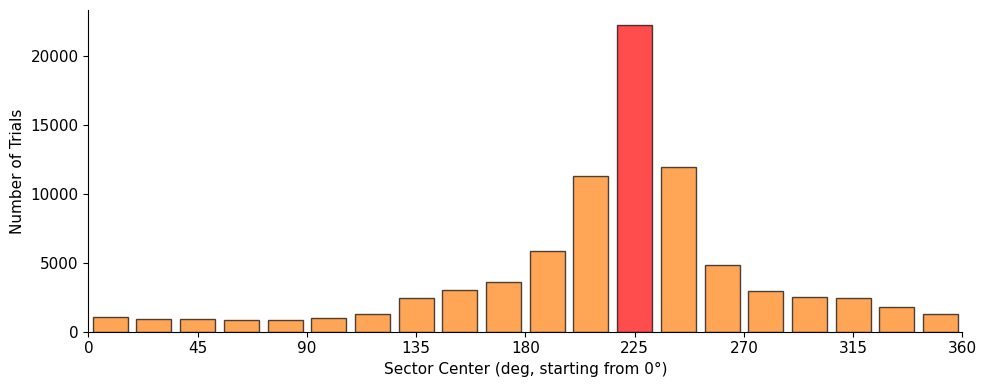

Mean of X axis (sector centers): 180.00, Std of X axis: 103.79


In [ ]:
# Only plot the histogram of number of trials per sector (starting from 0°), for all subjects and all conditions.
# Print "X" in the console after the plot.
# The tallest histogram bar should be colored red, others C1. Remove title and grid.

import numpy as np
import matplotlib.pyplot as plt

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

# Filter for valid trials (exclude NaN estimated_degree or motion_direction)
filtered_data = stable_rt_data[
    stable_rt_data['estimated_degree'].notna() &
    stable_rt_data['motion_direction'].notna() &
    stable_rt_data['trial_time'].notna()
]

N_sectors = 20
sector_edges = np.linspace(0, 360, N_sectors + 1)
sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

sector_counts = []
for i in range(N_sectors):
    lower = sector_edges[i]
    upper = sector_edges[i+1]
    # Use open/closed interval logic as before
    is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
    if is_it_open_close:
        mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
    else:
        mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)
    count = mask.sum()
    sector_counts.append(count)

sector_counts_arr = np.array(sector_counts)

fig, ax_hist = plt.subplots(1, 1, figsize=(10, 4))

# Color all bars C1, except the tallest (max) which is red
bar_colors = ['C1'] * N_sectors
if np.any(sector_counts_arr > 0):
    max_idx = np.where(sector_counts_arr == sector_counts_arr.max())[0]
    for idx in max_idx:
        bar_colors[idx] = 'red'

bars = ax_hist.bar(sector_centers, sector_counts_arr, width=(360/N_sectors)*0.8, color=bar_colors, alpha=0.7, align='center', edgecolor='k')
ax_hist.set_xlim(0, 360)
ax_hist.set_xticks(np.arange(0, 361, 45))
ax_hist.set_xlabel('Sector Center (deg, starting from 0°)')
ax_hist.set_ylabel('Number of Trials')
# No title, no grid

plt.tight_layout()
plt.show()

print("X")


Dropdown(description='Subject ID:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), …

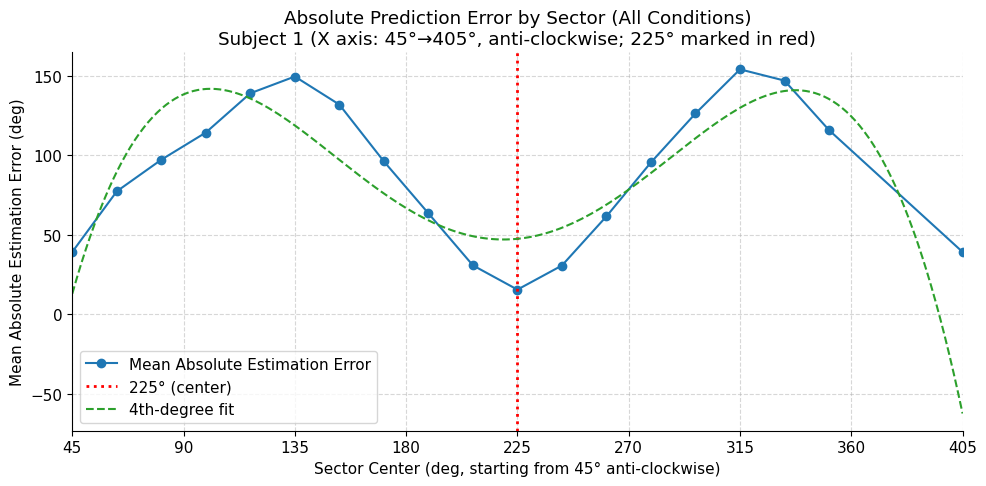

In [8]:
# Plot a single figure for a selected subject, showing mean absolute estimation error by sector,
# aggregating across all (prior_std, motion_coherence) conditions.
# Fit a 4-degree polynomial to the error curve.
# The x-axis starts from 45°, goes anti-clockwise, and reaches 405° (i.e., 45→405).
# The y-axis is mean absolute estimation error (in degrees).

import ipywidgets as widgets
from IPython.display import display, clear_output

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

subject_ids = sorted(stable_rt_data['subject_id'].unique())

subject_id_widget = widgets.Dropdown(
    options=subject_ids,
    value=subject_ids[0],
    description='Subject ID:',
    style={'description_width': 'initial'}
)

def plot_mean_abs_error_by_sector(subject_id):
    # Filter for the selected subject and valid trials
    filtered_data = stable_rt_data[
        (stable_rt_data['subject_id'] == subject_id) &
        (stable_rt_data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    sector_mean_abs_diffs = []
    for i in range(N_sectors):
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        # Use open/closed interval logic as before
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        if mask.sum() > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
        else:
            mean_abs_diff = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)

    # --- Plotting: mean absolute error by sector ---
    fig, ax = plt.subplots(figsize=(10, 5))

    # X axis: sector centers, starting from 45°, going anti-clockwise to 405° (i.e., 45° + 360°)
    start_angle = 45
    sector_centers_mod = (sector_centers - start_angle + 360) % 360
    sort_idx = np.argsort(sector_centers_mod)
    x_sorted = sector_centers[sort_idx]
    y_sorted = sector_mean_abs_diffs_arr[sort_idx]

    # To make the plot go from 45 to 405, append the first point at the end (for continuity)
    x_plot = np.concatenate([x_sorted, [x_sorted[0] + 360]])
    y_plot = np.concatenate([y_sorted, [y_sorted[0]]])
    mask = (x_plot >= 45) & (x_plot <= 405)
    x_plot = x_plot[mask]
    y_plot = y_plot[mask]

    # Plot mean absolute error per sector        
    ax.plot(x_plot, y_plot, marker='o', color='C0', label='Mean Absolute Estimation Error')

    # Mark 225° and 225+360=585° with a red dotted line (but only 225 and 225+360 if in range)
    for mark_angle in [225, 225+360]:
        if x_plot[0] <= mark_angle <= x_plot[-1]:
            ax.axvline(mark_angle, color='red', linestyle=':', linewidth=2, label='225° (center)' if mark_angle==225 else None)

    # Fit 4-degree polynomial (ignore NaNs)
    valid = ~np.isnan(y_plot)
    # Only fit to the first 20 points (not the repeated last point)
    if np.sum(valid[:-1]) >= 5:
        coeffs = np.polyfit(x_plot[:-1][valid[:-1]], y_plot[:-1][valid[:-1]], 4)
        x_fit = np.linspace(x_plot[0], x_plot[-1], 200)
        y_fit = np.polyval(coeffs, x_fit)
        ax.plot(x_fit, y_fit, color='C2', linestyle='--', label='4th-degree fit')

    # Set x limits to [45, 405]
    ax.set_xlim(45, 405)
    ax.set_xticks(np.arange(45, 406, 45))
    ax.set_xlabel('Sector Center (deg, starting from 45° anti-clockwise)')
    ax.set_ylabel('Mean Absolute Estimation Error (deg)')
    ax.set_title(
        f'Absolute Prediction Error by Sector (All Conditions)\n'
        f'Subject {subject_id} (X axis: 45°→405°, anti-clockwise; 225° marked in red)'
    )
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

def on_subject_id_change(change):
    clear_output(wait=True)
    display(subject_id_widget)
    plot_mean_abs_error_by_sector(change['new'])

subject_id_widget.observe(on_subject_id_change, names='value')

display(subject_id_widget)
plot_mean_abs_error_by_sector(subject_id_widget.value)


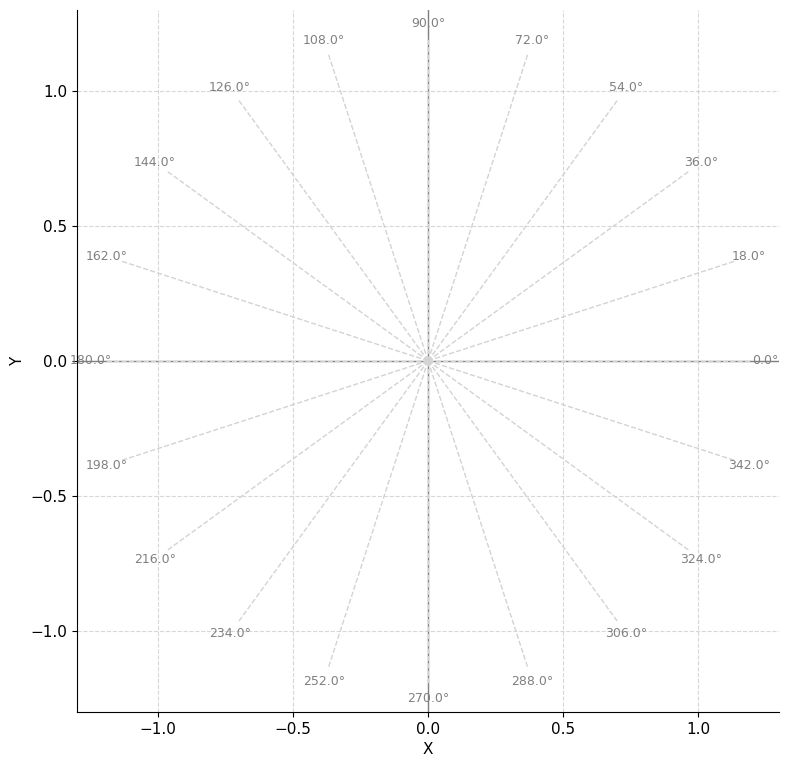

In [31]:
# Plot a single sector-wise coordination plot, aggregated over all subjects, for all prior_std values.
# (RTs and mean estimation error numbers are removed from all plots and labels.)
# All arrows are removed from the plot.

# No subject selection widget; aggregate over all data.

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

def plot_sector_distribution_aggregated_allstd():
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter for valid trial_time (include all prior_std)
    filtered_data = stable_rt_data[
        (stable_rt_data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # For the plot, collect stats per sector
    sector_counts = []
    for i in range(N_sectors):
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        count = mask.sum()
        sector_counts.append(count)

    sector_counts_arr = np.array(sector_counts)
    total_trials = len(filtered_data)

    # --- Plotting: sector plot only, no arrows ---
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(0, color='gray', linewidth=1)
    for sector in range(N_sectors):
        angle_deg = sector * (360 / N_sectors)
        angle_rad = np.radians(angle_deg)
        ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
        ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')

    # No arrows are drawn for any sector.
    # No special red arrow at 225 degrees.

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    # No title
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_sector_distribution_aggregated_allstd()


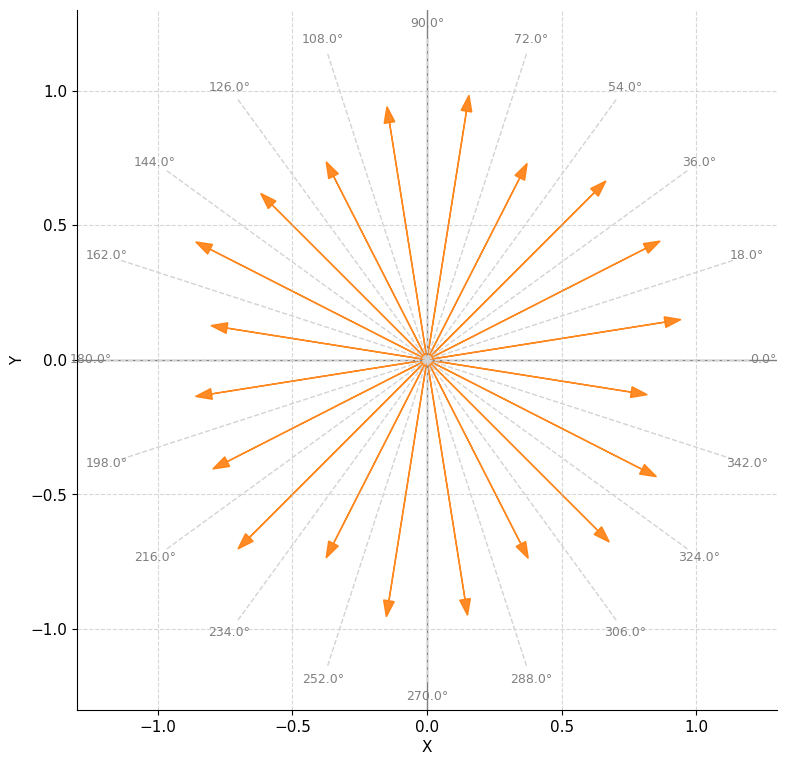

X


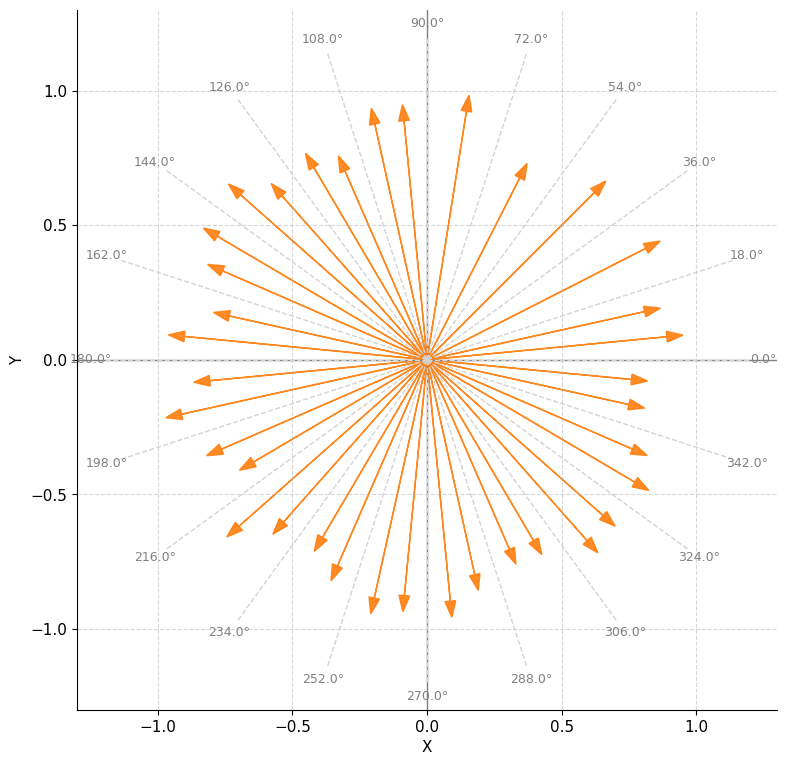

X


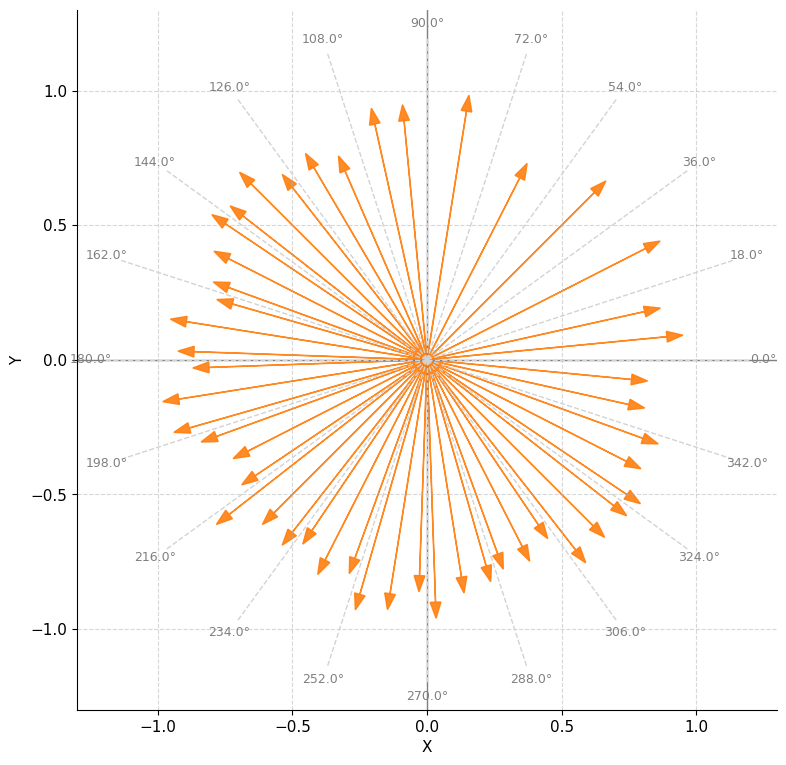

X


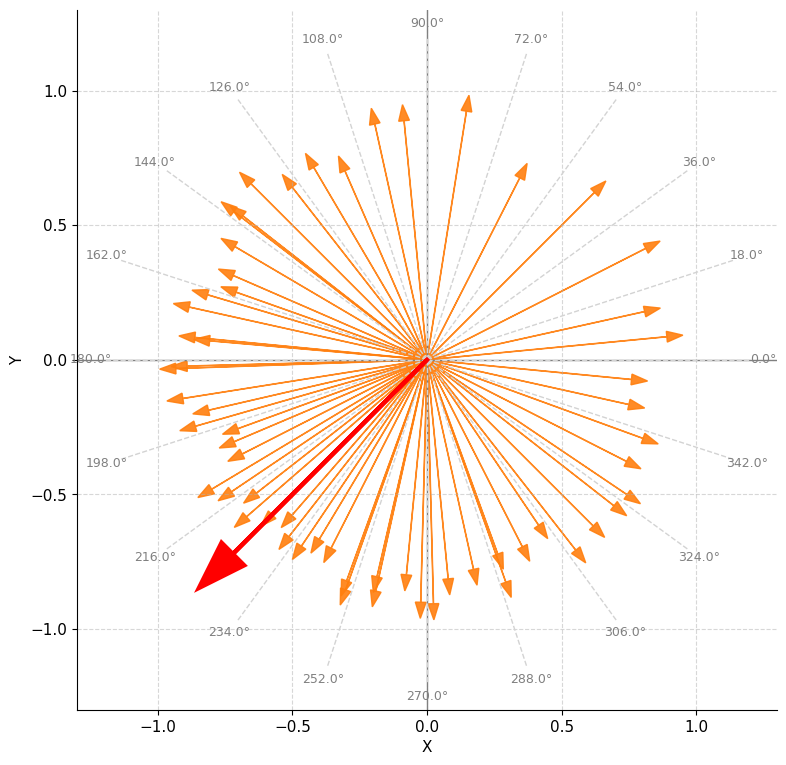

X


In [10]:
# Plot four sector-wise coordination plots, aggregated over all subjects, for all prior_std values.
# (RTs and mean estimation error numbers are removed from all plots and labels.)
# No subject selection widget; aggregate over all data.

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

def plot_sector_distribution_aggregated_allstd_progressive():
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter for valid trial_time (include all prior_std)
    filtered_data = stable_rt_data[
        (stable_rt_data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # For the plot, collect stats per sector
    sector_counts = []
    for i in range(N_sectors):
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        count = mask.sum()
        sector_counts.append(count)

    sector_counts_arr = np.array(sector_counts)
    total_trials = len(filtered_data)

    # Instead of arrow length, use number of arrows (1-5) per sector to indicate trial count
    # Map sector counts to 1-5 arrows (quantiles)
    if np.any(sector_counts_arr > 0):
        # Use quantiles to assign 1-5 arrows
        # If all counts are the same, all get 3 arrows
        if np.all(sector_counts_arr == sector_counts_arr[0]):
            arrow_nums = np.where(sector_counts_arr > 0, 3, 0)
        else:
            # Compute quantile bins
            nonzero_counts = sector_counts_arr[sector_counts_arr > 0]
            quantiles = np.quantile(nonzero_counts, [0, 0.2, 0.4, 0.6, 0.8, 1.0])
            arrow_nums = np.zeros_like(sector_counts_arr)
            for idx, count in enumerate(sector_counts_arr):
                if count == 0:
                    arrow_nums[idx] = 0
                else:
                    # Find which quantile bin this count falls into (1-5)
                    for q in range(5):
                        if quantiles[q] <= count <= quantiles[q+1]:
                            arrow_nums[idx] = q+1
                            break
    else:
        arrow_nums = np.zeros_like(sector_counts_arr)

    # For progressive plots: in each plot, only show up to N arrows per sector
    # Plot 4 plots: 1st with up to 1 arrow, 2nd up to 2, 3rd up to 3, 4th with all arrows and red line
    max_arrows_per_plot = [1, 2, 3, None]  # None means show all

    # Precompute arrow lengths for all sectors and all arrows, so that the same lengths are used in all plots
    rng = np.random.default_rng(42)  # fixed seed for reproducibility
    max_arrows_global = np.max(arrow_nums)
    # For each sector, precompute up to max_arrows_global lengths
    arrow_lengths_per_sector = []
    for n in arrow_nums:
        n = int(n)
        if n > 0:
            lengths = rng.uniform(0.8, 1.0, n)
        else:
            lengths = np.array([])
        arrow_lengths_per_sector.append(lengths)

    # Instead of subplots, plot and show each plot separately, printing "X" after each
    for plot_idx, max_arrows in enumerate(max_arrows_per_plot):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.axhline(0, color='gray', linewidth=1)
        ax.axvline(0, color='gray', linewidth=1)
        for sector in range(N_sectors):
            angle_deg = sector * (360 / N_sectors)
            angle_rad = np.radians(angle_deg)
            ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
            ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')
        # For each sector, draw up to max_arrows arrows (all same direction, slightly offset, fixed length per arrow)
        for i, center_deg in enumerate(sector_centers):
            angle_rad = np.radians(center_deg)
            n_arrows = int(arrow_nums[i])
            if max_arrows is not None:
                n_arrows_to_draw = min(n_arrows, max_arrows)
            else:
                n_arrows_to_draw = n_arrows
            if n_arrows_to_draw > 0:
                lengths = arrow_lengths_per_sector[i][:n_arrows_to_draw]
                offset_magnitude = 0.04  # how far to offset
                for j, length in enumerate(lengths):
                    # Offset direction: perpendicular to arrow direction
                    perp_angle = angle_rad + np.pi/2
                    # Center the arrows around the sector line
                    if n_arrows_to_draw == 1:
                        offset = 0
                    else:
                        offset = (j - (n_arrows_to_draw-1)/2) * offset_magnitude
                    # All arrows start from the center (0,0)
                    # To create a little overlap, we can slightly rotate the arrow direction by a small angle
                    if n_arrows_to_draw == 1:
                        angle_shift = 0
                    else:
                        # Spread arrows by up to +/- 7 degrees
                        angle_shift = (j - (n_arrows_to_draw-1)/2) * (7 * np.pi/180)
                    angle_rot = angle_rad + angle_shift
                    dx_rot = length * np.cos(angle_rot)
                    dy_rot = length * np.sin(angle_rot)
                    ax.arrow(0, 0, dx_rot, dy_rot,
                             head_width=0.04, head_length=0.06, fc='C1', ec='C1', length_includes_head=True, alpha=0.9)
            # No label for number of trials

        # Only in the last plot, add the special red arrow at 225 degrees, 3x thicker, 120% length
        if plot_idx == 3:
            angle_225_rad = np.radians(225)
            dx_225 = 1.2 * np.cos(angle_225_rad)
            dy_225 = 1.2 * np.sin(angle_225_rad)
            ax.arrow(0, 0, dx_225, dy_225,
                     head_width=0.12, head_length=0.18, fc='red', ec='red', length_includes_head=True, alpha=1.0, linewidth=3, zorder=10)

        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.set_aspect('equal')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # No title
        ax.grid(True, linestyle='--', alpha=0.5)
        plt.savefig(f"sector_distribution_progressive_{plot_idx+1}.png", dpi=150)
        plt.tight_layout()
        plt.show()
        print("X")

plot_sector_distribution_aggregated_allstd_progressive()


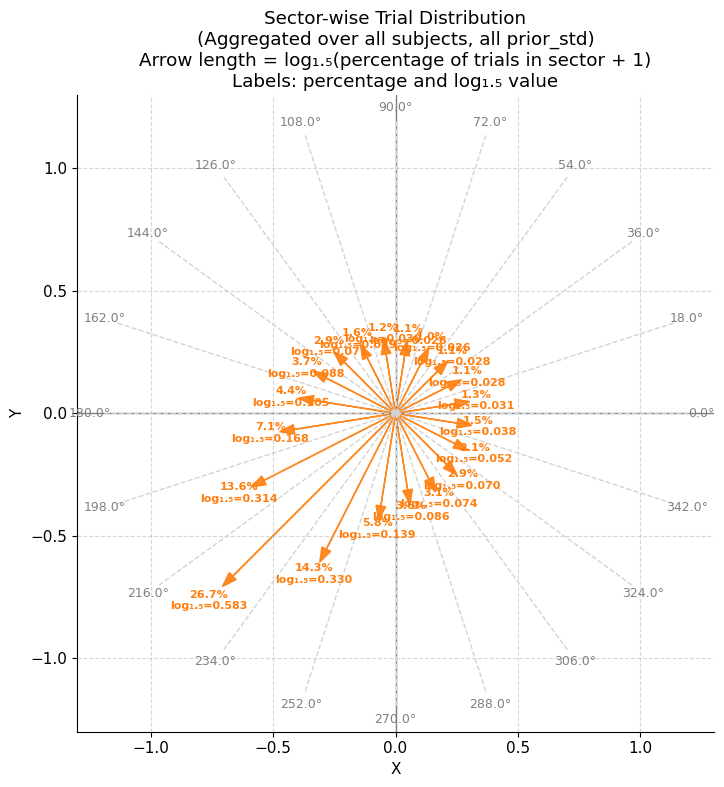

In [11]:
# Plot a single sector-wise coordination plot, aggregated over all subjects, for all prior_std values.
# (RTs and mean estimation error numbers are removed from all plots and labels.)

# No subject selection widget; aggregate over all data.

# Use stable_reaction_time_data with variable name stable_rt_data
stable_rt_data = stable_reaction_time_data
stable_rt_data = data

def plot_sector_distribution_aggregated_allstd():
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter for valid trial_time (include all prior_std)
    filtered_data = stable_rt_data[
        (stable_rt_data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # For the plot, collect stats per sector
    sector_counts = []
    for i in range(N_sectors):
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        count = mask.sum()
        sector_counts.append(count)

    sector_counts_arr = np.array(sector_counts)
    total_trials = len(filtered_data)

    # Compute percentage of trials per sector
    sector_percentages = sector_counts_arr / total_trials if total_trials > 0 else np.zeros_like(sector_counts_arr)
    # Arrow length: log base 1.5 (percentage + 1)
    def log_base(x, base):
        return np.log(x) / np.log(base)
    arrow_lengths = log_base(sector_percentages + 1, 1.5)

    # Normalize arrow lengths for better visualization (optional: scale to [0.3, 1.0])
    if np.any(arrow_lengths > 0):
        min_len = np.min(arrow_lengths[arrow_lengths > 0])
        max_len = np.max(arrow_lengths)
        # Avoid division by zero if all are the same
        if max_len > min_len:
            arrow_lengths_scaled = 0.3 + 0.7 * (arrow_lengths - min_len) / (max_len - min_len)
        else:
            arrow_lengths_scaled = np.where(arrow_lengths > 0, 0.7, 0.0)
    else:
        arrow_lengths_scaled = arrow_lengths

    # --- Plotting: sector plot only ---
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(0, color='gray', linewidth=1)
    for sector in range(N_sectors):
        angle_deg = sector * (360 / N_sectors)
        angle_rad = np.radians(angle_deg)
        ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
        ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')

    # For each sector, draw a single arrow, length = log base 1.5 (percentage + 1)
    for i, center_deg in enumerate(sector_centers):
        angle_rad = np.radians(center_deg)
        length = arrow_lengths_scaled[i]
        pct = sector_percentages[i]
        logval = arrow_lengths[i]
        if length > 0:
            dx = length * np.cos(angle_rad)
            dy = length * np.sin(angle_rad)
            ax.arrow(0, 0, dx, dy,
                     head_width=0.04, head_length=0.06, fc='C1', ec='C1', length_includes_head=True, alpha=0.9)
            # Write percentage and log value near the arrow tip
            label_x = 1.08 * length * np.cos(angle_rad)
            label_y = 1.08 * length * np.sin(angle_rad)
            ax.text(label_x, label_y,
                    f"{pct*100:.1f}%\nlog₁.₅={logval:.3f}",
                    fontsize=8, ha='center', va='center', color='C1', fontweight='bold')
        # No label for number of trials

    # (Red arrow at 225° removed as per instructions)

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(
        f"Sector-wise Trial Distribution\n"
        f"(Aggregated over all subjects, all prior_std)\n"
        f"Arrow length = log₁.₅(percentage of trials in sector + 1)\n"
        f"Labels: percentage and log₁.₅ value"
    )
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_sector_distribution_aggregated_allstd()


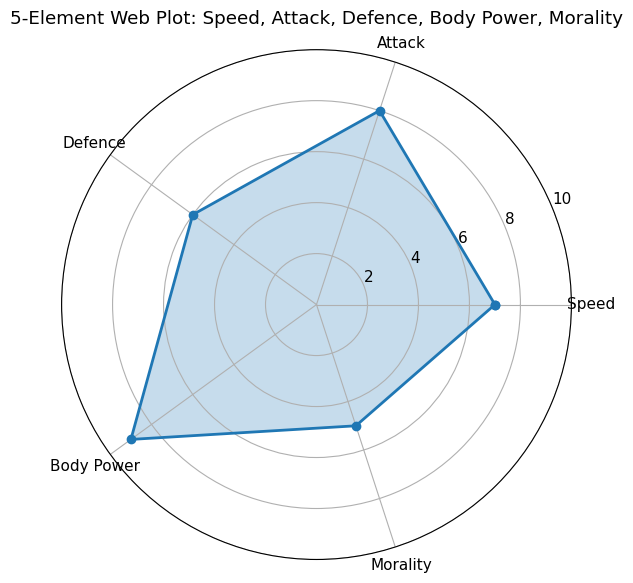

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_web_comparison(elements, values):
    """
    Plot a web (radar/spider) plot for 5 elements.
    elements: list of 5 strings (e.g., ['Speed', 'Attack', ...])
    values: list or array of 5 values (e.g., [7, 8, 6, 9, 5])
    """
    N = 5
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = list(values)
    values += values[:1]  # repeat the first value to close the circle
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2, label='Stats')
    ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), elements)
    ax.set_ylim(0, max(values) + 1)
    ax.set_title("5-Element Web Plot: Speed, Attack, Defence, Body Power, Morality", va='bottom')
    ax.grid(True)
    plt.show()

# Example usage:
elements = ['Speed', 'Attack', 'Defence', 'Body Power', 'Morality']
values = [7, 8, 6, 9, 5]
plot_web_comparison(elements, values)


/var/folders/gw/pl5k510n66xdsmblyc6gkkx00000gn/T/ipykernel_10461/215363452.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)  # reversed cividis: blue=small, yellow=large


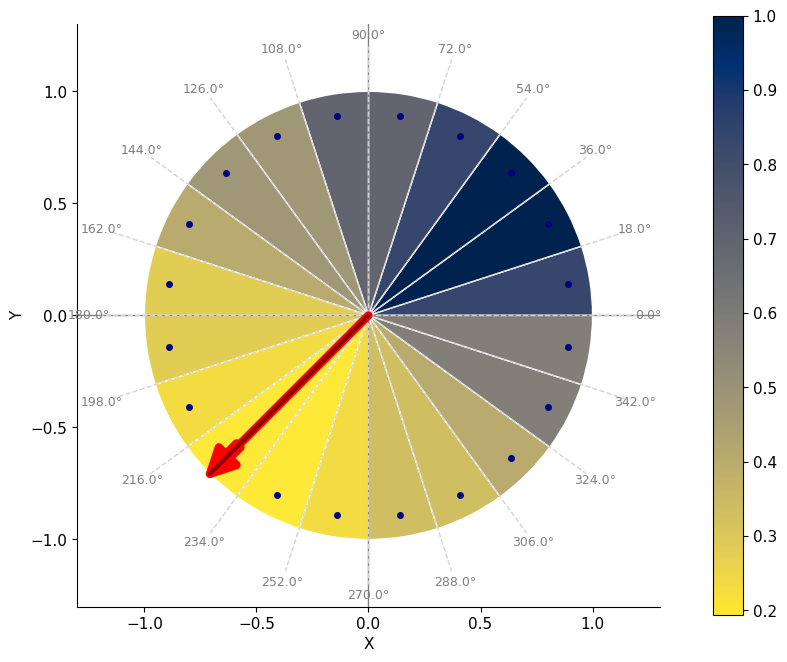

X


/var/folders/gw/pl5k510n66xdsmblyc6gkkx00000gn/T/ipykernel_10461/215363452.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("cividis_r")  # reversed: blue=small, yellow=large


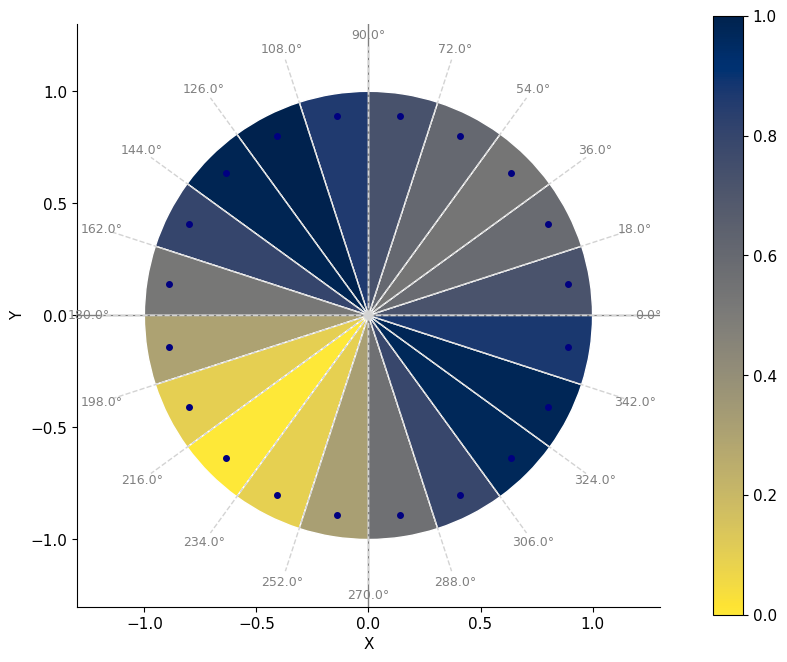

X


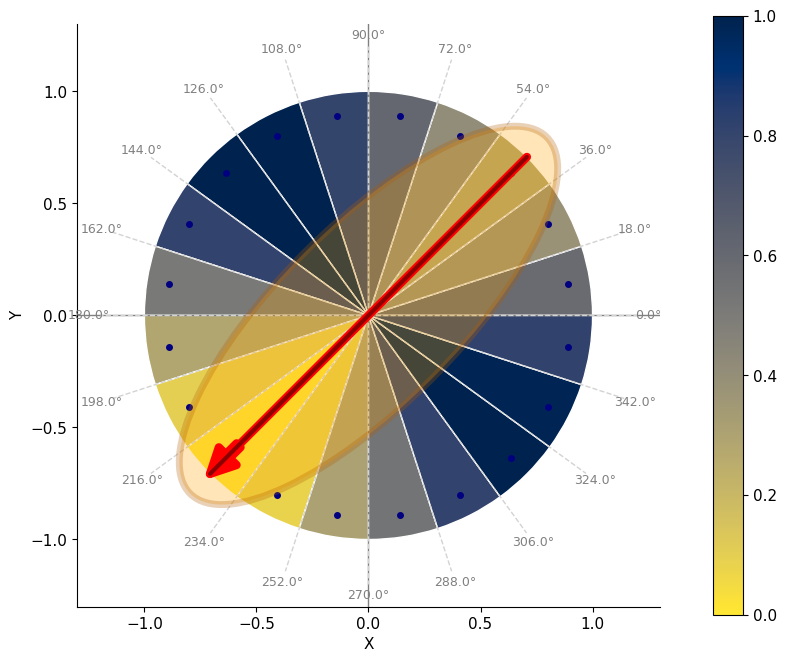

X


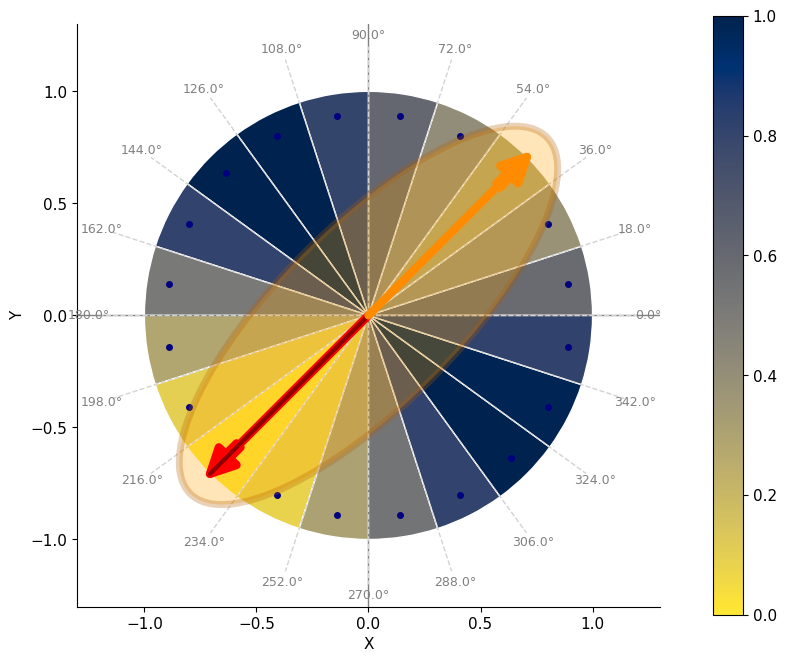

X


In [65]:
# Plot 3 different plots with this style, blue web plot, print("X") after each plot, web plot dots at sector centers.
# For the first plot, replace the blue web plot with coloring the sectors, each sector color will indicate the amount of mean absolute estimation error that happens there, using a dark color scale (e.g., 'cividis', which is perceptually uniform, dark, and readable on a white background; yellow for smaller error, blue for larger error).

stable_rt_data = stable_reaction_time_data
stable_rt_data = data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_sector_colored_by_mae(
    mae_values,
    label="Mean Abs. Error (Cividis: blue=small, yellow=large)",
    sector_edges=None,
    sector_centers=None,
    cmap_name="cividis_r"
):
    """
    Plot sectors colored by mean absolute error (mae_values), using a blue-yellow colormap.
    Blue is for smaller error, yellow is for larger error (reversed cividis colormap).
    """
    N_sectors = len(mae_values)
    if sector_edges is None:
        sector_edges = np.linspace(0, 360, N_sectors + 1)
    if sector_centers is None:
        sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(0, color='gray', linewidth=1)
    for sector in range(N_sectors):
        angle_deg = sector * (360 / N_sectors)
        angle_rad = np.radians(angle_deg)
        ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
        ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')

    # Normalize MAE values for colormap
    mae_values = np.array(mae_values)
    vmin = np.min(mae_values)
    vmax = np.max(mae_values)
    if vmax == vmin:
        vmax = vmin + 1e-6  # avoid division by zero
    cmap = mpl.cm.get_cmap(cmap_name)  # reversed cividis: blue=small, yellow=large
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    # Draw colored sector areas
    for i, center_deg in enumerate(sector_centers):
        color = cmap(norm(mae_values[i]))
        theta1 = sector_edges[i]
        theta2 = sector_edges[i+1]
        wedge = mpl.patches.Wedge(
            center=(0, 0),
            r=1.0,
            theta1=theta1,
            theta2=theta2,
            facecolor=color,
            edgecolor='white',
            lw=1,
            alpha=1.0
        )
        ax.add_patch(wedge)
        # Optionally, mark the sector center
        center_rad = np.radians(center_deg)
        ax.plot([0.9*np.cos(center_rad)], [0.9*np.sin(center_rad)], marker='o', color='navy', markersize=4)

    # Add colorbar (no label/title)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.08, fraction=0.045)
    cbar.set_label("")  # Remove colorbar title

    # Add prior mean arrow (red, from center to 225°)
    angle_deg = 225
    angle_rad = np.radians(angle_deg)
    r0 = 0.0
    r1 = 1.0
    x0 = r0 * np.cos(angle_rad)
    y0 = r0 * np.sin(angle_rad)
    x1 = r1 * np.cos(angle_rad)
    y1 = r1 * np.sin(angle_rad)
    ax.plot([x0, x1], [y0, y1], color='red', linewidth=6, zorder=30, solid_capstyle='round')
    ax.annotate(
        '',
        xy=(x1, y1),
        xytext=(x1 - 0.18*np.cos(angle_rad), y1 - 0.18*np.sin(angle_rad)),
        arrowprops=dict(facecolor='red', edgecolor='red', linewidth=6, shrink=0.0, headwidth=18, headlength=18),
        zorder=31
    )
    # Add dark red arrow (prior) to 225°
    ax.plot([x0, x1], [y0, y1], color='#8B0000', linewidth=3, zorder=32, solid_capstyle='round')

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    # Remove grid
    # ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    print("X")

def plot_sector_distribution_with_inverse_mae_web_std80(
    web_values_input=None, 
    blue_label="Mean Abs. Error (Cividis: blue=small, yellow=large)", 
    show_legend=False, 
    use_all_std=False,
    green_oval=False,
    show_prior_mean_arrow=False,
    prior_mean_arrow_mode="long",  # "long" (across center), "short" (from center out)
    show_45_arrow=False
):
    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # For the plot, collect stats per sector (arrows, etc) using real data
    if use_all_std:
        filtered_data = stable_rt_data[
            (stable_rt_data['trial_time'].notna())
        ]
    else:
        filtered_data = stable_rt_data[
            (stable_rt_data['trial_time'].notna()) &
            (stable_rt_data['prior_std'] == 80)
        ]

    # --- Web plot values ---
    if web_values_input is None:
        # Use real data: mean abs error per sector
        mae_per_sector = []
        for i in range(N_sectors):
            lower = sector_edges[i]
            upper = sector_edges[i+1]
            is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
            if is_it_open_close:
                mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
            else:
                mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)
            count = mask.sum()
            if count > 0:
                est = filtered_data.loc[mask, 'estimated_degree']
                mot = filtered_data.loc[mask, 'motion_direction']
                abs_err = np.abs(((est - mot + 180) % 360) - 180)
                mean_abs_err = abs_err.mean()
                mae_per_sector.append(mean_abs_err)
            else:
                mae_per_sector.append(0.0)
        mae_per_sector = np.array(mae_per_sector)
    else:
        mae_per_sector = np.array(web_values_input)

    # Scale values to [0, 1] for 2nd, 3rd, 4th plot
    min_mae = np.min(mae_per_sector)
    max_mae = np.max(mae_per_sector)
    if max_mae == min_mae:
        max_mae = min_mae + 1e-6
    mae_per_sector = (mae_per_sector - min_mae) / (max_mae - min_mae)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(0, color='gray', linewidth=1)
    for sector in range(N_sectors):
        angle_deg = sector * (360 / N_sectors)
        angle_rad = np.radians(angle_deg)
        ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
        ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')

    vmin = np.min(mae_per_sector)
    vmax = np.max(mae_per_sector)
    if vmax == vmin:
        vmax = vmin + 1e-6
    cmap = mpl.cm.get_cmap("cividis_r")  # reversed: blue=small, yellow=large
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for i, center_deg in enumerate(sector_centers):
        color = cmap(norm(mae_per_sector[i]))
        theta1 = sector_edges[i]
        theta2 = sector_edges[i+1]
        wedge = mpl.patches.Wedge(
            center=(0, 0),
            r=1.0,
            theta1=theta1,
            theta2=theta2,
            facecolor=color,
            edgecolor='white',
            lw=1,
            alpha=1.0
        )
        ax.add_patch(wedge)
        # Optionally, mark the sector center
        center_rad = np.radians(center_deg)
        ax.plot([0.9*np.cos(center_rad)], [0.9*np.sin(center_rad)], marker='o', color='navy', markersize=4)
    # Add colorbar for MAE (no label/title)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.08, fraction=0.045)
    cbar.set_label("")

    # Draw orange oval around 225/45 degree line if requested (bigger, thicker, darker border, no dotted line)
    if green_oval:
        import matplotlib.patches as mpatches
        ellipse = mpatches.Ellipse(
            (0, 0), 
            width=2.25, height=0.8,  # slightly bigger
            angle=45,
            edgecolor='#B35C00',  # darker orange border
            facecolor='orange',
            lw=5,  # slightly thicker
            zorder=20,
            alpha=0.28
        )
        ax.add_patch(ellipse)

    # Draw prior mean arrow (red, from center to 225°)
    if show_prior_mean_arrow:
        angle_deg = 225
        angle_rad = np.radians(angle_deg)
        if prior_mean_arrow_mode == "long":
            # In 3rd plot, extend stick from 45° to 225° (not pointing to 45°)
            # Draw a line from 45° to 225°, no arrowhead at 45°
            angle_45 = np.radians(45)
            r0 = 1.0
            r1 = 1.0
            x0 = r0 * np.cos(angle_45)
            y0 = r0 * np.sin(angle_45)
            x1 = r1 * np.cos(angle_rad)
            y1 = r1 * np.sin(angle_rad)
            ax.plot([x0, x1], [y0, y1], color='red', linewidth=6, zorder=30, solid_capstyle='round')
            # Arrowhead only at 225°
            ax.annotate(
                '',
                xy=(x1, y1),
                xytext=(x1 - 0.18*np.cos(angle_rad), y1 - 0.18*np.sin(angle_rad)),
                arrowprops=dict(facecolor='red', edgecolor='red', linewidth=6, shrink=0.0, headwidth=18, headlength=18),
                zorder=31
            )
            # Add dark red line on top
            ax.plot([x0, x1], [y0, y1], color='#8B0000', linewidth=3, zorder=32, solid_capstyle='round')
        elif prior_mean_arrow_mode == "short":
            r0 = 0.0
            r1 = 1.0
            x0 = r0 * np.cos(angle_rad)
            y0 = r0 * np.sin(angle_rad)
            x1 = r1 * np.cos(angle_rad)
            y1 = r1 * np.sin(angle_rad)
            ax.plot([x0, x1], [y0, y1], color='red', linewidth=6, zorder=30, solid_capstyle='round')
            ax.annotate(
                '', 
                xy=(x1, y1), 
                xytext=(x1 - 0.18*np.cos(angle_rad), y1 - 0.18*np.sin(angle_rad)),
                arrowprops=dict(facecolor='red', edgecolor='red', linewidth=6, shrink=0.0, headwidth=18, headlength=18),
                zorder=31
            )
            ax.plot([x0, x1], [y0, y1], color='#8B0000', linewidth=3, zorder=32, solid_capstyle='round')

    # Draw 45° arrow if requested (dark orange, from center out)
    if show_45_arrow:
        angle_deg = 45
        angle_rad = np.radians(angle_deg)
        r0 = 0.0
        r1 = 1.0
        x0 = r0 * np.cos(angle_rad)
        y0 = r0 * np.sin(angle_rad)
        x1 = r1 * np.cos(angle_rad)
        y1 = r1 * np.sin(angle_rad)
        ax.plot([x0, x1], [y0, y1], color='darkorange', linewidth=6, zorder=32, solid_capstyle='round')
        ax.annotate(
            '',
            xy=(x1, y1),
            xytext=(x1 - 0.18*np.cos(angle_rad), y1 - 0.18*np.sin(angle_rad)),
            arrowprops=dict(facecolor='darkorange', edgecolor='darkorange', linewidth=6, shrink=0.0, headwidth=18, headlength=18),
            zorder=33
        )

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    # Remove grid
    # ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    print("X")

# ---- Plot 1: Color sectors by mean absolute error using the requested sequence ----
N_sectors = 20
sector_edges = np.linspace(0, 360, N_sectors + 1)
sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2
dist_to_225 = np.abs(((sector_centers - 225 + 180) % 360) - 180)
sorted_indices = np.argsort(dist_to_225)

# Build the sequence: [1, 1, 1/1.5, 1/1.5, 1/1.5/1.5, 1/1.5/1.5, ...] as many as needed
seq = []
val = 1.0
while len(seq) < N_sectors:
    seq.append(val)
    seq.append(val)
    val = val / 1.2
seq = seq[:N_sectors]  # truncate to exactly N_sectors

# Reverse the sequence so that bins closer to 225 get smaller values (yellow), farther get larger (blue)
seq = seq[::-1]

mae_values1 = np.zeros(N_sectors)
for rank, idx in enumerate(sorted_indices):
    mae_values1[idx] = seq[rank]
# For coloring, higher MAE = yellow, lower MAE = blue (cividis_r colormap)
plot_sector_colored_by_mae(mae_values1, label="Synthetic Mean Abs. Error (Cividis: blue=small, yellow=large)", sector_edges=sector_edges, sector_centers=sector_centers, cmap_name="cividis_r")

# ---- Plot 2: Use real data (all std means), color sectors by mean absolute error (cividis_r colormap, scaled 0-1) ----
plot_sector_distribution_with_inverse_mae_web_std80(use_all_std=True)

# ---- Plot 3: Like plot 2, but with orange oval around 225/45 line (bigger, thicker, darker border), and prior mean arrow (long, from 45° to 225°) ----
plot_sector_distribution_with_inverse_mae_web_std80(green_oval=True, show_prior_mean_arrow=True, prior_mean_arrow_mode="long")

# ---- Plot 4: Like plot 3, but add an arrow pointing to 45° (dark orange), and shrink the red arrow to go from center to 225° only ----
plot_sector_distribution_with_inverse_mae_web_std80(
    green_oval=True,
    show_prior_mean_arrow=True,
    prior_mean_arrow_mode="short",
    show_45_arrow=True
)

/var/folders/gw/pl5k510n66xdsmblyc6gkkx00000gn/T/ipykernel_10461/1847159740.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('inferno')


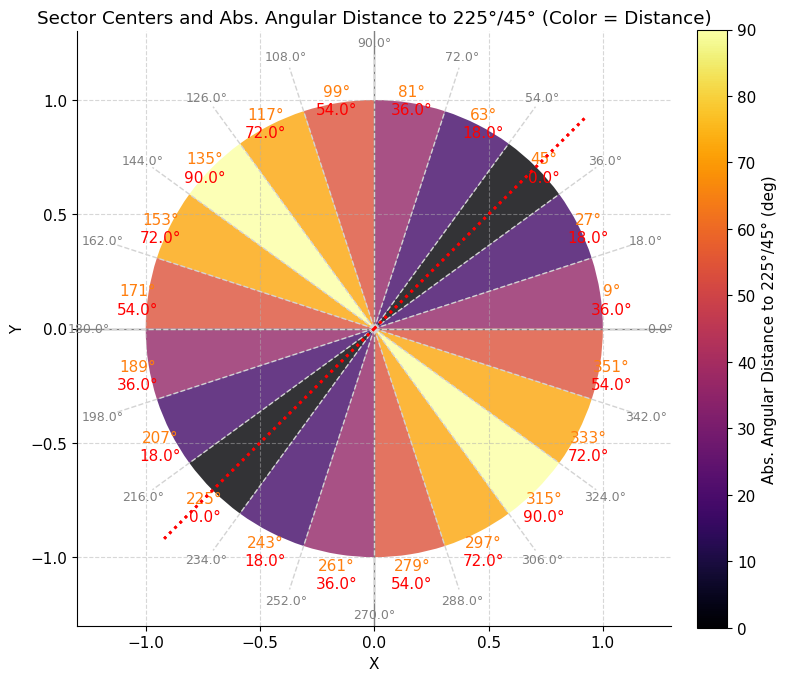

In [14]:
# Plot a single sectorwise plot (no error plot).
# Inside each sector, show only two things: the sector center (deg) and the absolute angular distance from the line that crosses 225° and 45° (i.e., the minimal absolute angular distance from the sector center to either 225° or 45°).
# (RTs, subject id, prior std, motion coherence, and strength are removed from all plots and labels.)

def plot_sector_centers_and_distances():
    import matplotlib as mpl

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # For each sector, compute the absolute angular distance from the sector center to the nearest of 225° or 45°
    def min_abs_angular_distance(angle, targets):
        # angle: scalar, targets: list of scalars
        # returns the minimal absolute angular distance (in deg) to any of the targets
        return min([np.abs(((angle - t + 180) % 360) - 180) for t in targets])

    abs_distances = np.array([min_abs_angular_distance(center, [225, 45]) for center in sector_centers])

    # Normalize abs_distances for colormap (0 = min, 1 = max)
    # Use a dark colormap, e.g., 'plasma' or 'inferno'
    cmap = mpl.cm.get_cmap('inferno')
    norm = mpl.colors.Normalize(vmin=abs_distances.min(), vmax=abs_distances.max())

    # --- Plotting: sector plot only ---
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.axhline(0, color='gray', linewidth=1)
    ax.axvline(0, color='gray', linewidth=1)
    for sector in range(N_sectors):
        angle_deg = sector * (360 / N_sectors)
        angle_rad = np.radians(angle_deg)
        ax.plot([0, 1.2*np.cos(angle_rad)], [0, 1.2*np.sin(angle_rad)], color='lightgray', linestyle='--', linewidth=1)
        ax.text(1.25*np.cos(angle_rad), 1.25*np.sin(angle_rad), f"{angle_deg}°", fontsize=9, ha='center', va='center', color='gray')
    # Draw colored sector areas
    for i, center_deg in enumerate(sector_centers):
        # Draw a filled sector with color based on abs_distance
        color = cmap(norm(abs_distances[i]))
        theta1 = sector_edges[i]
        theta2 = sector_edges[i+1]
        wedge = mpl.patches.Wedge(
            center=(0, 0),
            r=1.0,
            theta1=theta1,
            theta2=theta2,
            facecolor=color,
            edgecolor='none',
            alpha=0.8
        )
        ax.add_patch(wedge)
    # Draw sector center and abs angular distance text
    for i, center_deg in enumerate(sector_centers):
        angle_rad = np.radians(center_deg)
        # The sector center (deg) in default color, the abs angular distance in red
        ax.text(
            1.05*np.cos(angle_rad), 1.05*np.sin(angle_rad),
            f"{center_deg:.0f}°", fontsize=11, ha='center', va='center', color='C1'
        )
        ax.text(
            1.05*np.cos(angle_rad), 1.05*np.sin(angle_rad) - 0.08,  # offset a bit downward
            f"{abs_distances[i]:.1f}°", fontsize=11, ha='center', va='center', color='red'
        )

    # Draw the red dotted line that goes through 45° and 225°
    for base_angle in [45, 225]:
        angle_rad = np.radians(base_angle)
        ax.plot(
            [0, 1.3*np.cos(angle_rad)],
            [0, 1.3*np.sin(angle_rad)],
            color='red', linestyle=':', linewidth=2, zorder=10
        )
        # Also draw the opposite direction for the full line
        ax.plot(
            [0, -1.3*np.cos(angle_rad)],
            [0, -1.3*np.sin(angle_rad)],
            color='red', linestyle=':', linewidth=2, zorder=10
        )

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title("Sector Centers and Abs. Angular Distance to 225°/45° (Color = Distance)")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add colorbar for the abs angular distance
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Abs. Angular Distance to 225°/45° (deg)')

    plt.tight_layout()
    plt.show()

plot_sector_centers_and_distances()

Dropdown(description='Subject ID:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), …

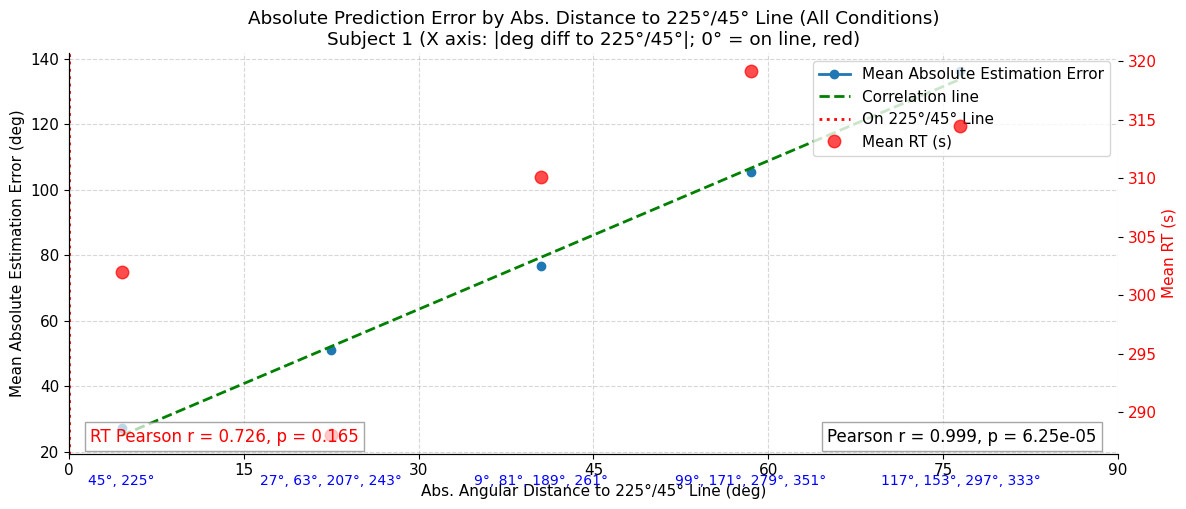

In [15]:

# Plot a single figure for a selected subject, showing mean absolute estimation error by sector,
# aggregating across all (prior_std, motion_coherence) conditions.
# The x-axis starts from 45°, goes anti-clockwise, and reaches 405° (i.e., 45→405).
# The y-axis is mean absolute estimation error (in degrees).
# Also calculate two-tailed Pearson correlation coefficient and p-value between x and y values.
# Additionally, plot mean RT for each sector as red dots and show correlation coefficient for RT.

import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.stats import pearsonr

# Use data with variable name stable_rt_data
stable_rt_data = data

subject_ids = sorted(stable_rt_data['subject_id'].unique())

subject_id_widget = widgets.Dropdown(
    options=subject_ids,
    value=subject_ids[0],
    description='Subject ID:',
    style={'description_width': 'initial'}
)

def abs_angular_distance_to_line(angle_deg, line1=225, line2=45):
    """
    Compute the minimal absolute angular distance from angle_deg to the closest of the two lines (225°, 45°).
    """
    # Normalize angles to [0, 360)
    angle_deg = np.asarray(angle_deg) % 360
    d1 = np.abs(((angle_deg - line1 + 180) % 360) - 180)
    d2 = np.abs(((angle_deg - line2 + 180) % 360) - 180)
    return np.minimum(d1, d2)

def plot_mean_abs_error_by_abs_distance(subject_id):
    # Filter for the selected subject and valid trials
    filtered_data = stable_rt_data[
        (stable_rt_data['subject_id'] == subject_id) &
        (stable_rt_data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # Compute mean abs error and mean RT for each sector
    sector_mean_abs_diffs = []
    sector_mean_rts = []
    for i in range(N_sectors):
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        # Use open/closed interval logic as before
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        if mask.sum() > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
            mean_rt = filtered_data.loc[mask, 'trial_time'].mean()
        else:
            mean_abs_diff = np.nan
            mean_rt = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)
        sector_mean_rts.append(mean_rt)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
    sector_mean_rts_arr = np.array(sector_mean_rts)
    sector_centers_arr = np.array(sector_centers)

    # Compute abs angular distance to the 225°/45° line for each sector center
    abs_distances = abs_angular_distance_to_line(sector_centers_arr)

    # Define abs distance bins (buckets) for the x axis
    # We'll use 10 bins from 0 to 90 (max possible abs distance)
    N_bins = 10
    bin_edges = np.linspace(0, 90, N_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # For each bin, find which sectors' centers fall into it, and compute the mean abs error and mean RT
    y_vals = []
    rt_vals = []
    sectors_in_bin = []
    for i in range(N_bins):
        in_bin = (abs_distances >= bin_edges[i]) & (abs_distances < bin_edges[i+1])
        # Save which sector centers are in this bin
        sector_labels = [f"{center:.0f}°" for center in sector_centers_arr[in_bin]]
        sectors_in_bin.append(sector_labels)
        # Compute mean of mean abs diffs for these sectors
        if np.any(in_bin):
            mean_error = np.nanmean(sector_mean_abs_diffs_arr[in_bin])
            mean_rt = np.nanmean(sector_mean_rts_arr[in_bin])
        else:
            mean_error = np.nan
            mean_rt = np.nan
        y_vals.append(mean_error)
        rt_vals.append(mean_rt)

    # Prepare x and y for correlation (remove nan pairs)
    x_corr = np.array(bin_centers)
    y_corr = np.array(y_vals)
    rt_corr = np.array(rt_vals)
    valid_error = ~np.isnan(x_corr) & ~np.isnan(y_corr)
    valid_rt = ~np.isnan(x_corr) & ~np.isnan(rt_corr)

    # Correlation for estimation error
    if np.sum(valid_error) > 1:
        r, p = pearsonr(x_corr[valid_error], y_corr[valid_error])
        corr_text = f"Pearson r = {r:.3f}, p = {p:.3g}"
        # For regression line
        slope = (y_corr[valid_error] - y_corr[valid_error].mean()).dot(x_corr[valid_error] - x_corr[valid_error].mean()) / ((x_corr[valid_error] - x_corr[valid_error].mean())**2).sum()
        intercept = y_corr[valid_error].mean() - slope * x_corr[valid_error].mean()
        reg_x = np.array([x_corr[valid_error].min(), x_corr[valid_error].max()])
        reg_y = intercept + slope * reg_x
    else:
        corr_text = "Not enough data for correlation"
        reg_x = reg_y = None

    # Correlation for RT
    if np.sum(valid_rt) > 1:
        r_rt, p_rt = pearsonr(x_corr[valid_rt], rt_corr[valid_rt])
        corr_text_rt = f"RT Pearson r = {r_rt:.3f}, p = {p_rt:.3g}"
        # For regression line (not plotted, but could be)
    else:
        corr_text_rt = "Not enough data for RT correlation"

    # --- Plotting: mean absolute error by abs angular distance to line ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot mean absolute error per abs distance bin as connected dots
    ax1.plot(bin_centers, y_vals, marker='o', color='C0', label='Mean Absolute Estimation Error', linestyle='-', linewidth=2)

    # Draw correlation line in green if possible
    if reg_x is not None and reg_y is not None:
        ax1.plot(reg_x, reg_y, color='green', linestyle='--', linewidth=2, label='Correlation line')

    # Mark 0° (i.e., on the line) with a red dotted line
    ax1.axvline(0, color='red', linestyle=':', linewidth=2, label='On 225°/45° Line')

    # Plot mean RT per abs distance bin as red dots (secondary y-axis)
    ax2 = ax1.twinx()
    ax2.plot(bin_centers, rt_vals, marker='o', color='red', linestyle='None', label='Mean RT (s)', markersize=9, alpha=0.7)
    ax2.set_ylabel('Mean RT (s)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set x limits to [0, 90] (max possible abs distance to either line in 0-360°)
    ax1.set_xlim(0, 90)
    ax1.set_xticks(np.arange(0, 91, 15))
    ax1.set_xlabel('Abs. Angular Distance to 225°/45° Line (deg)')
    ax1.set_ylabel('Mean Absolute Estimation Error (deg)')
    ax1.set_title(
        f'Absolute Prediction Error by Abs. Distance to 225°/45° Line (All Conditions)\n'
        f'Subject {subject_id} (X axis: |deg diff to 225°/45°|; 0° = on line, red)'
    )
    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Annotate beneath each x tick which sector centers are included in that bin
    for i, (x, labels) in enumerate(zip(bin_centers, sectors_in_bin)):
        if labels:
            # Place text below the x axis, in blue, with sector centers separated by commas
            ax1.text(
                x, ax1.get_ylim()[0] - 0.05*(ax1.get_ylim()[1] - ax1.get_ylim()[0]),
                ', '.join(labels),
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )

    # Show correlation result for estimation error on the plot (bottom right)
    ax1.text(
        0.98, 0.02, corr_text,
        transform=ax1.transAxes,
        fontsize=12, color='black', ha='right', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )
    # Show correlation result for RT on the plot (bottom left)
    ax2.text(
        0.02, 0.02, corr_text_rt,
        transform=ax2.transAxes,
        fontsize=12, color='red', ha='left', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    # Adjust bottom margin to fit the annotations
    plt.tight_layout(rect=(0, 0.13, 1, 1))

    plt.show()

def on_subject_id_change(change):
    clear_output(wait=True)
    display(subject_id_widget)
    plot_mean_abs_error_by_abs_distance(change['new'])

subject_id_widget.observe(on_subject_id_change, names='value')

display(subject_id_widget)
plot_mean_abs_error_by_abs_distance(subject_id_widget.value)

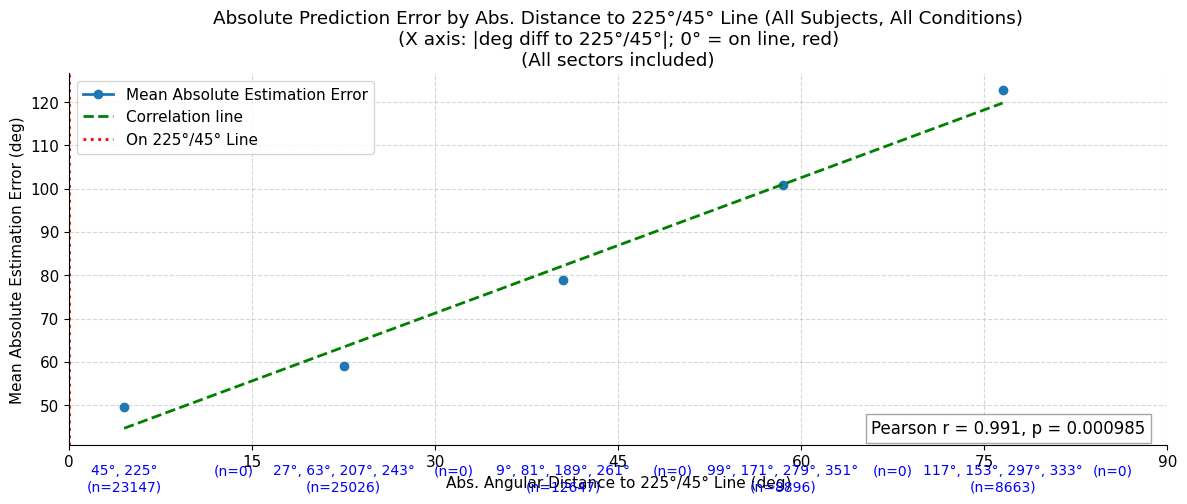

In [16]:
# Remove subject_id widget and calculate all subjects together
# Add: show how many trials are included in each bin
# Now: include all sectors (do not exclude any sector)

def plot_mean_abs_error_by_abs_distance_all_subjects():
    # Filter for valid trials across all subjects
    filtered_data = data[
        (data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # Use all sectors (no exclusion)
    filtered_sector_centers = sector_centers
    filtered_sector_indices = np.arange(N_sectors)

    # Compute mean abs error for each sector (all sectors)
    sector_mean_abs_diffs = []
    sector_trial_counts = []
    for i in filtered_sector_indices:
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        trial_count = mask.sum()
        sector_trial_counts.append(trial_count)
        if trial_count > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
        else:
            mean_abs_diff = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
    sector_centers_arr = np.array(filtered_sector_centers)
    sector_trial_counts_arr = np.array(sector_trial_counts)

    # Compute abs angular distance to the 225°/45° line for each sector center
    abs_distances = abs_angular_distance_to_line(sector_centers_arr)

    # Define abs distance bins (buckets) for the x axis
    N_bins = 10
    bin_edges = np.linspace(0, 90, N_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # For each bin, find which sectors' centers fall into it, and compute the mean abs error
    y_vals = []
    sectors_in_bin = []
    trials_in_bin = []
    for i in range(N_bins):
        in_bin = (abs_distances >= bin_edges[i]) & (abs_distances < bin_edges[i+1])
        sector_labels = [f"{center:.0f}°" for center in sector_centers_arr[in_bin]]
        sectors_in_bin.append(sector_labels)
        # Count total trials in this bin (sum over sectors in bin)
        n_trials = sector_trial_counts_arr[in_bin].sum()
        trials_in_bin.append(n_trials)
        if np.any(in_bin):
            mean_error = np.nanmean(sector_mean_abs_diffs_arr[in_bin])
        else:
            mean_error = np.nan
        y_vals.append(mean_error)

    # Prepare x and y for correlation (remove nan pairs)
    x_corr = np.array(bin_centers)
    y_corr = np.array(y_vals)
    valid = ~np.isnan(x_corr) & ~np.isnan(y_corr)
    if np.sum(valid) > 1:
        r, p = pearsonr(x_corr[valid], y_corr[valid])
        corr_text = f"Pearson r = {r:.3f}, p = {p:.3g}"
        slope = (y_corr[valid] - y_corr[valid].mean()).dot(x_corr[valid] - x_corr[valid].mean()) / ((x_corr[valid] - x_corr[valid].mean())**2).sum()
        intercept = y_corr[valid].mean() - slope * x_corr[valid].mean()
        reg_x = np.array([x_corr[valid].min(), x_corr[valid].max()])
        reg_y = intercept + slope * reg_x
    else:
        corr_text = "Not enough data for correlation"
        reg_x = reg_y = None

    # --- Plotting: mean absolute error by abs angular distance to line ---
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(bin_centers, y_vals, marker='o', color='C0', label='Mean Absolute Estimation Error', linestyle='-', linewidth=2)

    if reg_x is not None and reg_y is not None:
        ax.plot(reg_x, reg_y, color='green', linestyle='--', linewidth=2, label='Correlation line')

    ax.axvline(0, color='red', linestyle=':', linewidth=2, label='On 225°/45° Line')

    ax.set_xlim(0, 90)
    ax.set_xticks(np.arange(0, 91, 15))
    ax.set_xlabel('Abs. Angular Distance to 225°/45° Line (deg)')
    ax.set_ylabel('Mean Absolute Estimation Error (deg)')
    ax.set_title(
        f'Absolute Prediction Error by Abs. Distance to 225°/45° Line (All Subjects, All Conditions)\n'
        f'(X axis: |deg diff to 225°/45°|; 0° = on line, red)\n'
        f'(All sectors included)'
    )
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    for i, (x, labels, n_trials) in enumerate(zip(bin_centers, sectors_in_bin, trials_in_bin)):
        if labels:
            # Show sector centers and trial count in this bin
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                ', '.join(labels) + f"\n(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )
        else:
            # Still show trial count if 0, for completeness
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                f"(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )

    ax.text(
        0.98, 0.02, corr_text,
        transform=ax.transAxes,
        fontsize=12, color='black', ha='right', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    plt.tight_layout(rect=(0, 0.13, 1, 1))
    plt.show()

# Call the function to plot for all subjects
plot_mean_abs_error_by_abs_distance_all_subjects()


Dropdown(description='Subject ID:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), …

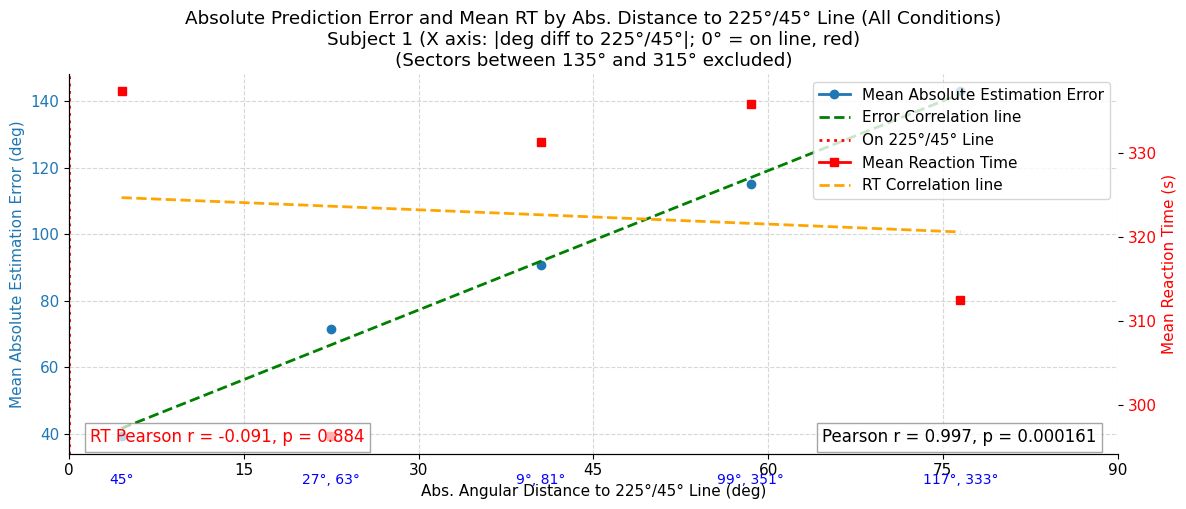

In [17]:
# Plot a single figure for a selected subject, showing mean absolute estimation error by sector,
# aggregating across all (prior_std, motion_coherence) conditions.
# The x-axis starts from 45°, goes anti-clockwise, and reaches 405° (i.e., 45→405).
# The y-axis is mean absolute estimation error (in degrees).
# Also calculate two-tailed Pearson correlation coefficient and p-value between x and y values.
# Remove bulks (sectors) that are between 135° and 315° anti-clockwise (i.e., sector centers in [135, 315]).
# Additionally, plot mean reaction time in red and calculate its correlation and p-value with abs distance.

import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.stats import pearsonr

# Use data with variable name stable_rt_data
stable_rt_data = data

subject_ids = sorted(stable_rt_data['subject_id'].unique())

subject_id_widget = widgets.Dropdown(
    options=subject_ids,
    value=subject_ids[0],
    description='Subject ID:',
    style={'description_width': 'initial'}
)

def abs_angular_distance_to_line(angle_deg, line1=225, line2=45):
    """
    Compute the minimal absolute angular distance from angle_deg to the closest of the two lines (225°, 45°).
    """
    # Normalize angles to [0, 360)
    angle_deg = np.asarray(angle_deg) % 360
    d1 = np.abs(((angle_deg - line1 + 180) % 360) - 180)
    d2 = np.abs(((angle_deg - line2 + 180) % 360) - 180)
    return np.minimum(d1, d2)

def plot_mean_abs_error_by_abs_distance(subject_id):
    # Filter for the selected subject and valid trials
    filtered_data = data[
        (data['subject_id'] == subject_id) &
        (data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # Remove sectors whose centers are between 135 and 315 anti-clockwise
    # That is, keep only those with sector_centers < 135 or sector_centers > 315
    keep_mask = (sector_centers < 135) | (sector_centers > 315)
    filtered_sector_centers = sector_centers[keep_mask]
    filtered_sector_indices = np.where(keep_mask)[0]

    # Compute mean abs error and mean RT for each sector (only for kept sectors)
    sector_mean_abs_diffs = []
    sector_mean_rts = []
    for i in filtered_sector_indices:
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        # Use open/closed interval logic as before
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        if mask.sum() > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
            mean_rt = filtered_data.loc[mask, 'trial_time'].mean()
        else:
            mean_abs_diff = np.nan
            mean_rt = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)
        sector_mean_rts.append(mean_rt)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
    sector_mean_rts_arr = np.array(sector_mean_rts)
    sector_centers_arr = np.array(filtered_sector_centers)

    # Compute abs angular distance to the 225°/45° line for each sector center
    abs_distances = abs_angular_distance_to_line(sector_centers_arr)

    # Define abs distance bins (buckets) for the x axis
    # We'll use 10 bins from 0 to 90 (max possible abs distance)
    N_bins = 10
    bin_edges = np.linspace(0, 90, N_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # For each bin, find which sectors' centers fall into it, and compute the mean abs error and mean RT
    y_vals = []
    rt_vals = []
    sectors_in_bin = []
    for i in range(N_bins):
        in_bin = (abs_distances >= bin_edges[i]) & (abs_distances < bin_edges[i+1])
        # Save which sector centers are in this bin
        sector_labels = [f"{center:.0f}°" for center in sector_centers_arr[in_bin]]
        sectors_in_bin.append(sector_labels)
        # Compute mean of mean abs diffs for these sectors
        if np.any(in_bin):
            mean_error = np.nanmean(sector_mean_abs_diffs_arr[in_bin])
            mean_rt = np.nanmean(sector_mean_rts_arr[in_bin])
        else:
            mean_error = np.nan
            mean_rt = np.nan
        y_vals.append(mean_error)
        rt_vals.append(mean_rt)

    # Prepare x and y for correlation (remove nan pairs)
    x_corr = np.array(bin_centers)
    y_corr = np.array(y_vals)
    rt_corr = np.array(rt_vals)
    valid_error = ~np.isnan(x_corr) & ~np.isnan(y_corr)
    valid_rt = ~np.isnan(x_corr) & ~np.isnan(rt_corr)

    # Correlation for estimation error
    if np.sum(valid_error) > 1:
        r, p = pearsonr(x_corr[valid_error], y_corr[valid_error])
        corr_text = f"Pearson r = {r:.3f}, p = {p:.3g}"
        # For regression line
        slope = (y_corr[valid_error] - y_corr[valid_error].mean()).dot(x_corr[valid_error] - x_corr[valid_error].mean()) / ((x_corr[valid_error] - x_corr[valid_error].mean())**2).sum()
        intercept = y_corr[valid_error].mean() - slope * x_corr[valid_error].mean()
        reg_x = np.array([x_corr[valid_error].min(), x_corr[valid_error].max()])
        reg_y = intercept + slope * reg_x
    else:
        corr_text = "Not enough data for correlation"
        reg_x = reg_y = None

    # Correlation for mean RT
    if np.sum(valid_rt) > 1:
        r_rt, p_rt = pearsonr(x_corr[valid_rt], rt_corr[valid_rt])
        corr_text_rt = f"RT Pearson r = {r_rt:.3f}, p = {p_rt:.3g}"
        # For regression line
        slope_rt = (rt_corr[valid_rt] - rt_corr[valid_rt].mean()).dot(x_corr[valid_rt] - x_corr[valid_rt].mean()) / ((x_corr[valid_rt] - x_corr[valid_rt].mean())**2).sum()
        intercept_rt = rt_corr[valid_rt].mean() - slope_rt * x_corr[valid_rt].mean()
        reg_x_rt = np.array([x_corr[valid_rt].min(), x_corr[valid_rt].max()])
        reg_y_rt = intercept_rt + slope_rt * reg_x_rt
    else:
        corr_text_rt = "Not enough data for RT correlation"
        reg_x_rt = reg_y_rt = None

    # --- Plotting: mean absolute error and mean RT by abs angular distance to line ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot mean absolute error per abs distance bin as connected dots
    l1, = ax1.plot(bin_centers, y_vals, marker='o', color='C0', label='Mean Absolute Estimation Error', linestyle='-', linewidth=2)
    # Draw correlation line in green if possible
    if reg_x is not None and reg_y is not None:
        l2, = ax1.plot(reg_x, reg_y, color='green', linestyle='--', linewidth=2, label='Error Correlation line')
    # Mark 0° (i.e., on the line) with a red dotted line
    ax1.axvline(0, color='red', linestyle=':', linewidth=2, label='On 225°/45° Line')

    ax1.set_xlim(0, 90)
    ax1.set_xticks(np.arange(0, 91, 15))
    ax1.set_xlabel('Abs. Angular Distance to 225°/45° Line (deg)')
    ax1.set_ylabel('Mean Absolute Estimation Error (deg)', color='C0')
    ax1.tick_params(axis='y', labelcolor='C0')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Create a second y-axis for mean RT
    ax2 = ax1.twinx()
    l3, = ax2.plot(bin_centers, rt_vals, marker='s', color='red', label='Mean Reaction Time', linestyle='-', linewidth=2)
    if reg_x_rt is not None and reg_y_rt is not None:
        l4, = ax2.plot(reg_x_rt, reg_y_rt, color='orange', linestyle='--', linewidth=2, label='RT Correlation line')
    ax2.set_ylabel('Mean Reaction Time (s)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Annotate beneath each x tick which sector centers are included in that bin
    for i, (x, labels) in enumerate(zip(bin_centers, sectors_in_bin)):
        if labels:
            # Place text below the x axis, in blue, with sector centers separated by commas
            ax1.text(
                x, ax1.get_ylim()[0] - 0.05*(ax1.get_ylim()[1] - ax1.get_ylim()[0]),
                ', '.join(labels),
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )

    # Show correlation result for estimation error on the plot (bottom right)
    ax1.text(
        0.98, 0.02, corr_text,
        transform=ax1.transAxes,
        fontsize=12, color='black', ha='right', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )
    # Show correlation result for RT on the plot (bottom left)
    ax2.text(
        0.02, 0.02, corr_text_rt,
        transform=ax2.transAxes,
        fontsize=12, color='red', ha='left', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    # Set title
    ax1.set_title(
        f'Absolute Prediction Error and Mean RT by Abs. Distance to 225°/45° Line (All Conditions)\n'
        f'Subject {subject_id} (X axis: |deg diff to 225°/45°|; 0° = on line, red)\n'
        f'(Sectors between 135° and 315° excluded)'
    )

    # Adjust bottom margin to fit the annotations
    plt.tight_layout(rect=(0, 0.13, 1, 1))

    plt.show()

def on_subject_id_change(change):
    clear_output(wait=True)
    display(subject_id_widget)
    plot_mean_abs_error_by_abs_distance(change['new'])

subject_id_widget.observe(on_subject_id_change, names='value')

display(subject_id_widget)
plot_mean_abs_error_by_abs_distance(subject_id_widget.value)

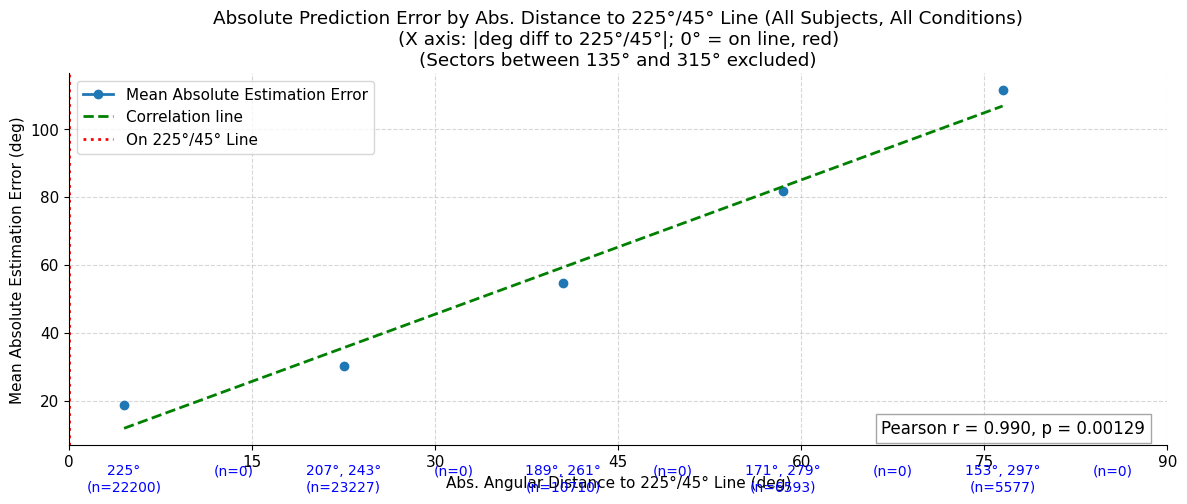

In [18]:
# Remove subject_id widget and calculate all subjects together
# Add: show how many trials are included in each bin

def plot_mean_abs_error_by_abs_distance_all_subjects():
    # Filter for valid trials across all subjects
    filtered_data = data[
        (data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # Remove sectors whose centers are between 135 and 315 anti-clockwise
    keep_mask = (sector_centers >= 135) & (sector_centers <= 315)
    filtered_sector_centers = sector_centers[keep_mask]
    filtered_sector_indices = np.where(keep_mask)[0]

    # Compute mean abs error for each sector (only for kept sectors)
    sector_mean_abs_diffs = []
    sector_trial_counts = []
    for i in filtered_sector_indices:
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        trial_count = mask.sum()
        sector_trial_counts.append(trial_count)
        if trial_count > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
        else:
            mean_abs_diff = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
    sector_centers_arr = np.array(filtered_sector_centers)
    sector_trial_counts_arr = np.array(sector_trial_counts)

    # Compute abs angular distance to the 225°/45° line for each sector center
    abs_distances = abs_angular_distance_to_line(sector_centers_arr)

    # Define abs distance bins (buckets) for the x axis
    N_bins = 10
    bin_edges = np.linspace(0, 90, N_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # For each bin, find which sectors' centers fall into it, and compute the mean abs error
    y_vals = []
    sectors_in_bin = []
    trials_in_bin = []
    for i in range(N_bins):
        in_bin = (abs_distances >= bin_edges[i]) & (abs_distances < bin_edges[i+1])
        sector_labels = [f"{center:.0f}°" for center in sector_centers_arr[in_bin]]
        sectors_in_bin.append(sector_labels)
        # Count total trials in this bin (sum over sectors in bin)
        n_trials = sector_trial_counts_arr[in_bin].sum()
        trials_in_bin.append(n_trials)
        if np.any(in_bin):
            mean_error = np.nanmean(sector_mean_abs_diffs_arr[in_bin])
        else:
            mean_error = np.nan
        y_vals.append(mean_error)

    # Prepare x and y for correlation (remove nan pairs)
    x_corr = np.array(bin_centers)
    y_corr = np.array(y_vals)
    valid = ~np.isnan(x_corr) & ~np.isnan(y_corr)
    if np.sum(valid) > 1:
        r, p = pearsonr(x_corr[valid], y_corr[valid])
        corr_text = f"Pearson r = {r:.3f}, p = {p:.3g}"
        slope = (y_corr[valid] - y_corr[valid].mean()).dot(x_corr[valid] - x_corr[valid].mean()) / ((x_corr[valid] - x_corr[valid].mean())**2).sum()
        intercept = y_corr[valid].mean() - slope * x_corr[valid].mean()
        reg_x = np.array([x_corr[valid].min(), x_corr[valid].max()])
        reg_y = intercept + slope * reg_x
    else:
        corr_text = "Not enough data for correlation"
        reg_x = reg_y = None

    # --- Plotting: mean absolute error by abs angular distance to line ---
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(bin_centers, y_vals, marker='o', color='C0', label='Mean Absolute Estimation Error', linestyle='-', linewidth=2)

    if reg_x is not None and reg_y is not None:
        ax.plot(reg_x, reg_y, color='green', linestyle='--', linewidth=2, label='Correlation line')

    ax.axvline(0, color='red', linestyle=':', linewidth=2, label='On 225°/45° Line')

    ax.set_xlim(0, 90)
    ax.set_xticks(np.arange(0, 91, 15))
    ax.set_xlabel('Abs. Angular Distance to 225°/45° Line (deg)')
    ax.set_ylabel('Mean Absolute Estimation Error (deg)')
    ax.set_title(
        f'Absolute Prediction Error by Abs. Distance to 225°/45° Line (All Subjects, All Conditions)\n'
        f'(X axis: |deg diff to 225°/45°|; 0° = on line, red)\n'
        f'(Sectors between 135° and 315° excluded)'
    )
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    for i, (x, labels, n_trials) in enumerate(zip(bin_centers, sectors_in_bin, trials_in_bin)):
        if labels:
            # Show sector centers and trial count in this bin
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                ', '.join(labels) + f"\n(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )
        else:
            # Still show trial count if 0, for completeness
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                f"(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )

    ax.text(
        0.98, 0.02, corr_text,
        transform=ax.transAxes,
        fontsize=12, color='black', ha='right', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    plt.tight_layout(rect=(0, 0.13, 1, 1))
    plt.show()

# Call the function to plot for all subjects
plot_mean_abs_error_by_abs_distance_all_subjects()


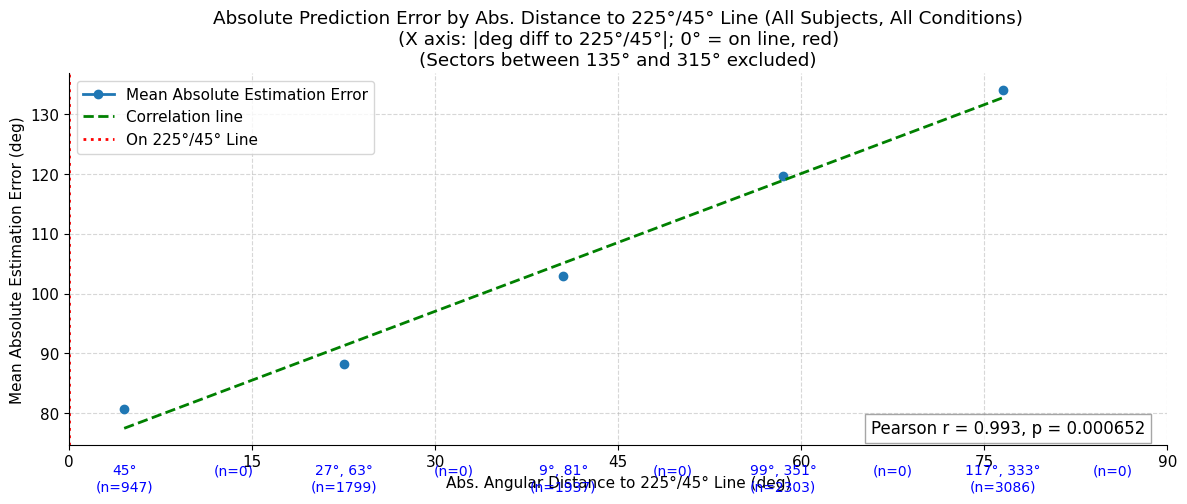

In [19]:
# Remove subject_id widget and calculate all subjects together
# Add: show how many trials are included in each bin

def plot_mean_abs_error_by_abs_distance_all_subjects():
    # Filter for valid trials across all subjects
    filtered_data = data[
        (data['trial_time'].notna())
    ]

    N_sectors = 20
    sector_edges = np.linspace(0, 360, N_sectors + 1)
    sector_centers = (sector_edges[:-1] + sector_edges[1:]) / 2

    # Remove sectors whose centers are between 135 and 315 anti-clockwise
    keep_mask = (sector_centers < 135) | (sector_centers > 315)
    filtered_sector_centers = sector_centers[keep_mask]
    filtered_sector_indices = np.where(keep_mask)[0]

    # Compute mean abs error for each sector (only for kept sectors)
    sector_mean_abs_diffs = []
    sector_trial_counts = []
    for i in filtered_sector_indices:
        lower = sector_edges[i]
        upper = sector_edges[i+1]
        is_it_open_close = True if abs(lower % 180 - 225 ) < abs(upper % 180 - 225) else False
        if is_it_open_close:
            mask = (filtered_data['estimated_degree'] >= lower) & (filtered_data['estimated_degree'] < upper)
        else:
            mask = (filtered_data['estimated_degree'] > lower) & (filtered_data['estimated_degree'] <= upper)

        trial_count = mask.sum()
        sector_trial_counts.append(trial_count)
        if trial_count > 0:
            diffs = np.abs(((filtered_data.loc[mask, 'estimated_degree'] - filtered_data.loc[mask, 'motion_direction'] + 180) % 360) - 180)
            mean_abs_diff = diffs.mean()
        else:
            mean_abs_diff = np.nan
        sector_mean_abs_diffs.append(mean_abs_diff)

    sector_mean_abs_diffs_arr = np.array(sector_mean_abs_diffs)
    sector_centers_arr = np.array(filtered_sector_centers)
    sector_trial_counts_arr = np.array(sector_trial_counts)

    # Compute abs angular distance to the 225°/45° line for each sector center
    abs_distances = abs_angular_distance_to_line(sector_centers_arr)

    # Define abs distance bins (buckets) for the x axis
    N_bins = 10
    bin_edges = np.linspace(0, 90, N_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # For each bin, find which sectors' centers fall into it, and compute the mean abs error
    y_vals = []
    sectors_in_bin = []
    trials_in_bin = []
    for i in range(N_bins):
        in_bin = (abs_distances >= bin_edges[i]) & (abs_distances < bin_edges[i+1])
        sector_labels = [f"{center:.0f}°" for center in sector_centers_arr[in_bin]]
        sectors_in_bin.append(sector_labels)
        # Count total trials in this bin (sum over sectors in bin)
        n_trials = sector_trial_counts_arr[in_bin].sum()
        trials_in_bin.append(n_trials)
        if np.any(in_bin):
            mean_error = np.nanmean(sector_mean_abs_diffs_arr[in_bin])
        else:
            mean_error = np.nan
        y_vals.append(mean_error)

    # Prepare x and y for correlation (remove nan pairs)
    x_corr = np.array(bin_centers)
    y_corr = np.array(y_vals)
    valid = ~np.isnan(x_corr) & ~np.isnan(y_corr)
    if np.sum(valid) > 1:
        r, p = pearsonr(x_corr[valid], y_corr[valid])
        corr_text = f"Pearson r = {r:.3f}, p = {p:.3g}"
        slope = (y_corr[valid] - y_corr[valid].mean()).dot(x_corr[valid] - x_corr[valid].mean()) / ((x_corr[valid] - x_corr[valid].mean())**2).sum()
        intercept = y_corr[valid].mean() - slope * x_corr[valid].mean()
        reg_x = np.array([x_corr[valid].min(), x_corr[valid].max()])
        reg_y = intercept + slope * reg_x
    else:
        corr_text = "Not enough data for correlation"
        reg_x = reg_y = None

    # --- Plotting: mean absolute error by abs angular distance to line ---
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(bin_centers, y_vals, marker='o', color='C0', label='Mean Absolute Estimation Error', linestyle='-', linewidth=2)

    if reg_x is not None and reg_y is not None:
        ax.plot(reg_x, reg_y, color='green', linestyle='--', linewidth=2, label='Correlation line')

    ax.axvline(0, color='red', linestyle=':', linewidth=2, label='On 225°/45° Line')

    ax.set_xlim(0, 90)
    ax.set_xticks(np.arange(0, 91, 15))
    ax.set_xlabel('Abs. Angular Distance to 225°/45° Line (deg)')
    ax.set_ylabel('Mean Absolute Estimation Error (deg)')
    ax.set_title(
        f'Absolute Prediction Error by Abs. Distance to 225°/45° Line (All Subjects, All Conditions)\n'
        f'(X axis: |deg diff to 225°/45°|; 0° = on line, red)\n'
        f'(Sectors between 135° and 315° excluded)'
    )
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    for i, (x, labels, n_trials) in enumerate(zip(bin_centers, sectors_in_bin, trials_in_bin)):
        if labels:
            # Show sector centers and trial count in this bin
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                ', '.join(labels) + f"\n(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )
        else:
            # Still show trial count if 0, for completeness
            ax.text(
                x, ax.get_ylim()[0] - 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
                f"(n={n_trials})",
                fontsize=10, color='blue', ha='center', va='top', rotation=0
            )

    ax.text(
        0.98, 0.02, corr_text,
        transform=ax.transAxes,
        fontsize=12, color='black', ha='right', va='bottom',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    plt.tight_layout(rect=(0, 0.13, 1, 1))
    plt.show()

# Call the function to plot for all subjects
plot_mean_abs_error_by_abs_distance_all_subjects()
